ΕΡΩΤΗΜΑ 1 ΦΟΡΤΩΣΗ EXCEL

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#import pandas as pd
#print("pandas imported successfully.")
#df = pd.read_excel('/content/drive/MyDrive/University Year 4/Μηχανική Μάθηση /CLASSIFICATION/Dataset2Use_Assignment1.xlsx')

Με upload

In [3]:
from google.colab import files
import io
import pandas as pd

# 1. Εμφάνιση παραθύρου για επιλογή του αρχείου .xlsx
uploaded = files.upload()

# 2. Φόρτωση του αρχείου Excel σε ένα DataFrame
# Χρησιμοποιούμε την read_excel αντί για την read_csv
file_name = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[file_name]))

print(f"Το αρχείο Excel '{file_name}' ανέβηκε και διαβάστηκε επιτυχώς!")
display(df.head())

Saving Dataset2Use_Assignment1.xlsx to Dataset2Use_Assignment1.xlsx
Το αρχείο Excel 'Dataset2Use_Assignment1.xlsx' ανέβηκε και διαβάστηκε επιτυχώς!


,365* ( Β.Υ / Κοστ.Πωλ ),Λειτ.Αποτ/Συν.Ενεργ. (ROA),ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,(ΑΠΑΙΤ.*365) / ΠΩΛ.,Συν.Υποχρ/Συν.Ενεργ,Διάρκεια Παραμονής Αποθεμάτων,Λογαριθμος Προσωπικού,ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ,ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ,ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ,ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1),ΕΤΟΣ
0,1014.128862,0.011751,0.038505,0.965479,567.866550,0.532258,545.195964,0.301030,0,1,0,1,2006
1,561.974631,0.099662,0.015775,1.415467,335.917481,0.660556,7.950910,1.176091,1,1,1,1,2006
2,826.919025,0.009594,0.093562,1.575034,350.618086,0.550912,28.602221,1.204120,0,1,1,1,2006
3,493.176956,0.196284,0.000581,1.346780,414.508709,0.683717,1.216888,1.431364,0,0,0,1,2006
4,100.421465,0.179038,0.000173,3.299687,118.548381,0.254496,52.346321,1.518514,0,1,1,1,2006


ΕΡΩΤΗΜΑ 3 - ΕΛΕΓΧΟΣ ΓΙΑ NaN ΤΙΜΕΣ

In [4]:
#Έλεγχος για NaNs:
missing_values_count = df.isnull().sum()

print("Missing values per column:")
print(missing_values_count)

total_missing_values = missing_values_count.sum()
if total_missing_values > 0:
    print(f"\nMissing values were found in the dataset. Total missing: {total_missing_values}")
else:
    print("\nNo missing values were found in the dataset.")

Missing values per column:
365* ( Β.Υ / Κοστ.Πωλ )                           0
Λειτ.Αποτ/Συν.Ενεργ. (ROA)                        0
ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ                           0
 ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ    0
(ΑΠΑΙΤ.*365) / ΠΩΛ.                               0
Συν.Υποχρ/Συν.Ενεργ                               0
Διάρκεια Παραμονής Αποθεμάτων                     0
Λογαριθμος Προσωπικού                             0
ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ                                  0
ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ                                 0
ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ                            0
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)                     0
ΕΤΟΣ                                              0
dtype: int64

No missing values were found in the dataset.


MAPPING

Ο διαχωρισμός αυτός είναι απαραίτητος γιατί κάθε τύπος δεδομένου στην εργασία σου έχει διαφορετικό ρόλο και απαιτεί διαφορετική μεταχείριση από τους αλγόριθμους Μηχανικής Μάθησης.

In [5]:
column_mapping = {
    '365* ( Β.Υ / Κοστ.Πωλ )': 'A',
    'Λειτ.Αποτ/Συν.Ενεργ. (ROA)': 'B',
    'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ': 'C',
    ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ': 'D',
    '(ΑΠΑΙΤ.*365) / ΠΩΛ.': 'E',
    'Συν.Υποχρ/Συν.Ενεργ': 'F',
    'Διάρκεια Παραμονής Αποθεμάτων': 'G',
    'Λογαριθμος Προσωπικού': 'H',
    'ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ': 'I',
    'ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ': 'J',
    'ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ': 'K',
    'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)': 'Status',
    'ΕΤΟΣ': 'Year'
}

df_processed = df.rename(columns=column_mapping)

# Map the numerical values in the 'Status' column
df_processed['Status'] = df_processed['Status'].map({1: 'Healthy', 2: 'Bankrupt'})

# Define the column lists for clarity
indicator_cols = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
binary_cols = ['I', 'J', 'K']
target_col = 'Status'
year_col = 'Year'

print("Columns renamed and Status values mapped.")
print(df_processed.head())

Columns renamed and Status values mapped.
             A         B         C         D           E         F  \
0  1014.128862  0.011751  0.038505  0.965479  567.866550  0.532258   
1   561.974631  0.099662  0.015775  1.415467  335.917481  0.660556   
2   826.919025  0.009594  0.093562  1.575034  350.618086  0.550912   
3   493.176956  0.196284  0.000581  1.346780  414.508709  0.683717   
4   100.421465  0.179038  0.000173  3.299687  118.548381  0.254496   

            G         H  I  J  K   Status  Year  
0  545.195964  0.301030  0  1  0  Healthy  2006  
1    7.950910  1.176091  1  1  1  Healthy  2006  
2   28.602221  1.204120  0  1  1  Healthy  2006  
3    1.216888  1.431364  0  0  0  Healthy  2006  
4   52.346321  1.518514  0  1  1  Healthy  2006  


ΕΡΩΤΗΜΑ 2 - FIGURE 1

In [6]:
status_counts = df_processed.groupby(['Year', 'Status']).size().unstack(fill_value=0)
print("Company status counts per year:")
print(status_counts.head())

Company status counts per year:
Status  Bankrupt  Healthy
Year                     
2006          52     2748
2007          53     2846
2008          99     2731
2009          44     2143


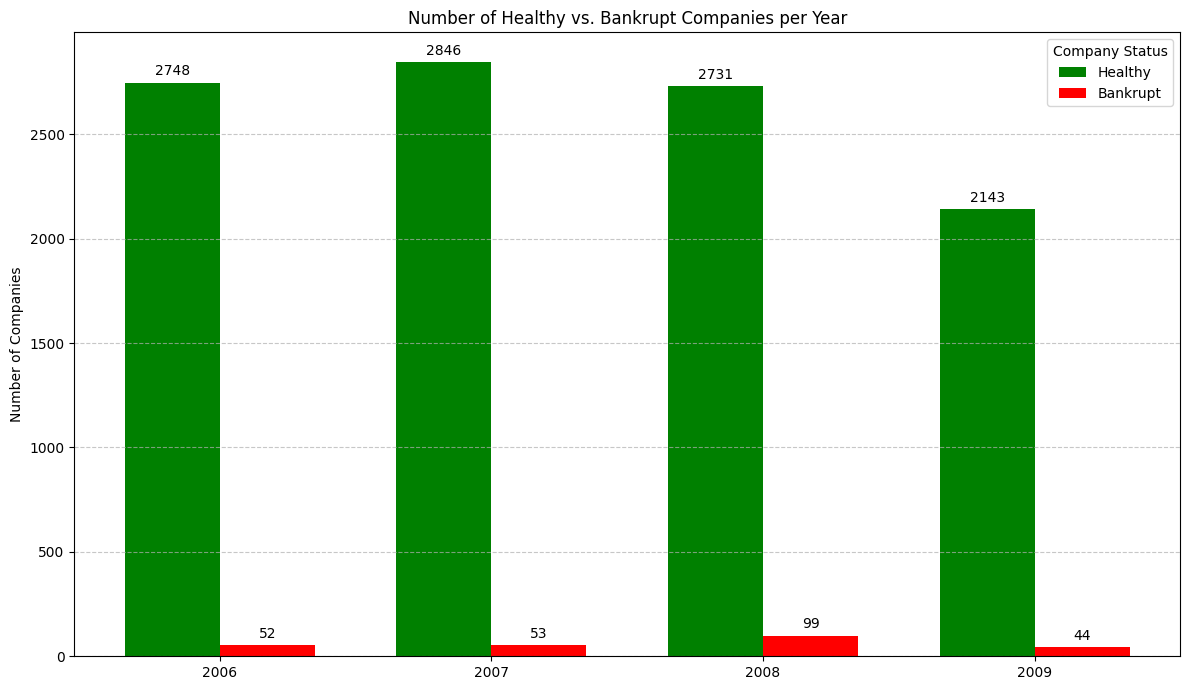

Grouped bar chart generated successfully (Figure 1).


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Προετοιμασία δεδομένων
years = status_counts.index
healthy_vals = status_counts['Healthy']
bankrupt_vals = status_counts['Bankrupt']

x = np.arange(len(years))  # Οι θέσεις των ετών στον άξονα Χ
width = 0.35  # Το πάχος κάθε μπάρας

fig, ax = plt.subplots(figsize=(12, 7))

# Δημιουργία των δύο κατηγοριών μπαρών δίπλα-δίπλα
rects1 = ax.bar(x - width/2, healthy_vals, width, label='Healthy', color='green')
rects2 = ax.bar(x + width/2, bankrupt_vals, width, label='Bankrupt', color='red')

# Προσθήκη κειμένου, τίτλων και ετικετών
ax.set_ylabel('Number of Companies')
ax.set_title('Number of Healthy vs. Bankrupt Companies per Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend(title='Company Status')

# Αυτόματη προσθήκη των αριθμών πάνω από κάθε μπάρα (όπως στην εικόνα σου)
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Grouped bar chart generated successfully (Figure 1).")

ΕΡΩΤΗΜΑ 2 - Figure 2 (Προετοιμασία)


In [8]:
from sklearn.preprocessing import MinMaxScaler
print("MinMaxScaler imported successfully.")

MinMaxScaler imported successfully.


ΕΡΩΤΗΜΑ 4 - ΚΑΝΟΝΙΚΟΠΟΙΗΣΗ ΔΕΔΟΜΕΝΩΝ ΣΤΟ [0,1]

In [9]:
all_indicator_cols = indicator_cols + binary_cols

scaler = MinMaxScaler()
df_normalized = df_processed.copy()
df_normalized[all_indicator_cols] = scaler.fit_transform(df_processed[all_indicator_cols])

print("Min-Max normalization applied to indicators A-K. First 5 rows of df_normalized:")
print(df_normalized.head())

Min-Max normalization applied to indicators A-K. First 5 rows of df_normalized:
          A         B         C         D         E         F         G  \
0  0.675945  0.556137  0.192526  0.192989  0.473222  0.318549  0.409274   
1  0.374377  0.636057  0.078877  0.282999  0.279931  0.395393  0.005969   
2  0.551084  0.554176  0.467810  0.314916  0.292182  0.329722  0.021471   
3  0.328492  0.723895  0.002904  0.269259  0.345424  0.409265  0.000914   
4  0.066540  0.708216  0.000866  0.659892  0.098790  0.152183  0.039296   

          H    I    J    K   Status  Year  
0  0.102743  0.0  1.0  0.0  Healthy  2006  
1  0.401406  1.0  1.0  1.0  Healthy  2006  
2  0.410972  0.0  1.0  1.0  Healthy  2006  
3  0.488532  0.0  0.0  0.0  Healthy  2006  
4  0.518277  0.0  1.0  1.0  Healthy  2006  


In [10]:
df_healthy_normalized = df_normalized[df_normalized['Status'] == 'Healthy']
df_bankrupt_normalized = df_normalized[df_normalized['Status'] == 'Bankrupt']

df_healthy_stats_normalized = df_healthy_normalized[indicator_cols].agg(['min', 'max', 'mean']).transpose()
df_bankrupt_stats_normalized = df_bankrupt_normalized[indicator_cols].agg(['min', 'max', 'mean']).transpose()

print("Normalized statistics for Healthy Companies:")
print(df_healthy_stats_normalized.head())
print("\nNormalized statistics for Bankrupt Companies:")
print(df_bankrupt_stats_normalized.head())

Normalized statistics for Healthy Companies:
   min  max      mean
A  0.0  1.0  0.294125
B  0.0  1.0  0.581176
C  0.0  1.0  0.140740
D  0.0  1.0  0.229732
E  0.0  1.0  0.176589

Normalized statistics for Bankrupt Companies:
        min       max      mean
A  0.011152  1.000000  0.431033
B  0.000000  0.972786  0.510098
C  0.000000  1.000000  0.309585
D  0.001632  1.000000  0.169940
E  0.000000  1.000000  0.232101


ΕΡΩΤΗΜΑ 2 - FIGURE 2

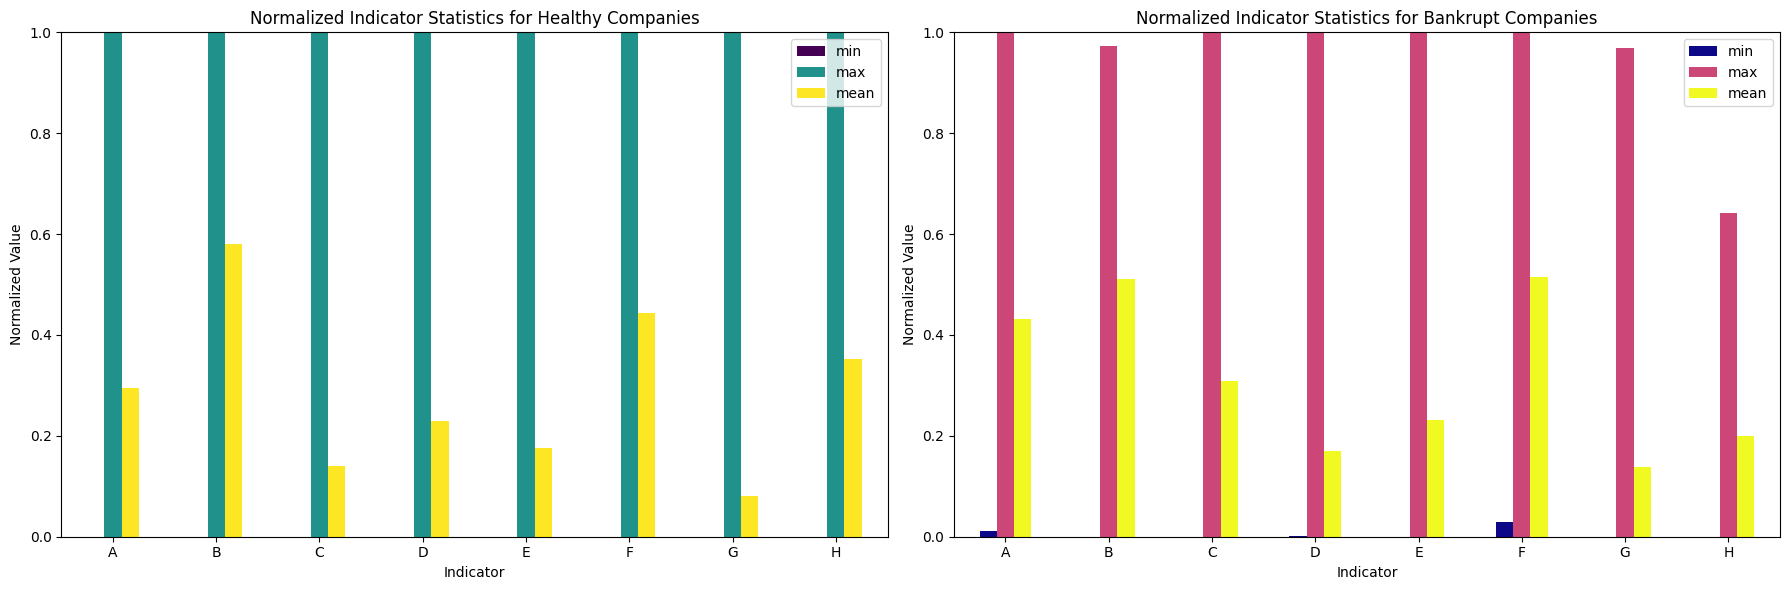

Combined bar chart of normalized indicator statistics for healthy and bankrupt companies displayed.


In [11]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Left subplot for Healthy Companies
df_healthy_stats_normalized.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title('Normalized Indicator Statistics for Healthy Companies')
axes[0].set_xlabel('Indicator')
axes[0].set_ylabel('Normalized Value')
axes[0].set_ylim(0, 1)
axes[0].legend(title='')
axes[0].tick_params(axis='x', rotation=0)

# Right subplot for Bankrupt Companies
df_bankrupt_stats_normalized.plot(kind='bar', ax=axes[1], colormap='plasma')
axes[1].set_title('Normalized Indicator Statistics for Bankrupt Companies')
axes[1].set_xlabel('Indicator')
axes[1].set_ylabel('Normalized Value')
axes[1].set_ylim(0, 1)
axes[1].legend(title='')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()
print("Combined bar chart of normalized indicator statistics for healthy and bankrupt companies displayed.")

HEATMAP (Model Performance Heatmap) for comparing many models and many metrics at the same time BEFORE TRAINNING THE MODELS

Baseline Evaluation on Unbalanced Data (First Fold Only)
------------------------------------------------------
Train set class distribution (unbalanced):
Status
Healthy     7851
Bankrupt     186
Name: count, dtype: int64

Test set class distribution (unbalanced):
Status
Healthy     2617
Bankrupt      62
Name: count, dtype: int64

Training LDA for Baseline Evaluation...

Training Logistic Regression for Baseline Evaluation...

Training Decision Tree for Baseline Evaluation...

Training Random Forest for Baseline Evaluation...

Training k-NN for Baseline Evaluation...

Training Naive Bayes for Baseline Evaluation...

Training SVM for Baseline Evaluation...

Training XGBoost for Baseline Evaluation...


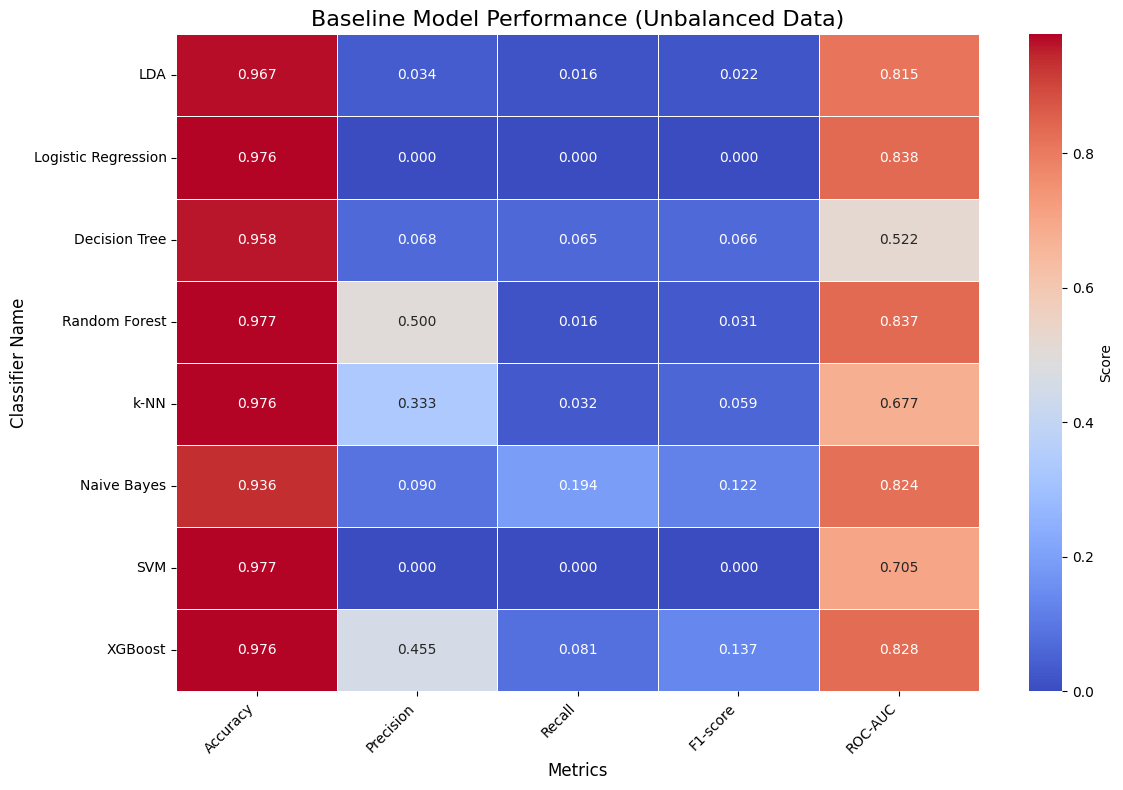

Baseline Model Performance Heatmap generated successfully.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for machine learning models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Imports for evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Import for StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Define X, y, and skf for this baseline evaluation
X = df_normalized[all_indicator_cols]  # Features (indicators A-K)
y = df_normalized[target_col]          # Target variable (Status)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Re-define the models dictionary for this baseline evaluation to ensure fresh models
models_baseline = {
    'LDA': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

baseline_results = []

# Get the first fold's data for baseline (unbalanced)
# X and y are already defined as df_normalized[all_indicator_cols] and df_normalized[target_col]

# This iterates through the skf object to get the first split
first_train_index, first_test_index = next(iter(skf.split(X, y)))

X_train_baseline = X.iloc[first_train_index]
y_train_baseline = y.iloc[first_train_index]
X_test_baseline = X.iloc[first_test_index]
y_test_baseline = y.iloc[first_test_index]

print("Baseline Evaluation on Unbalanced Data (First Fold Only)")
print("------------------------------------------------------")
print("Train set class distribution (unbalanced):")
print(y_train_baseline.value_counts())
print("\nTest set class distribution (unbalanced):")
print(y_test_baseline.value_counts())


for name, model in models_baseline.items():
    print(f"\nTraining {name} for Baseline Evaluation...")

    # Prepare target variable for model training (XGBoost needs numerical)
    y_train_for_model = y_train_baseline
    y_test_for_eval = y_test_baseline
    if name == 'XGBoost':
        y_train_for_model = y_train_baseline.map({'Healthy': 0, 'Bankrupt': 1})
        y_test_for_eval = y_test_baseline.map({'Healthy': 0, 'Bankrupt': 1})

    model.fit(X_train_baseline, y_train_for_model)
    y_pred_test = model.predict(X_test_baseline)

    y_prob_test = None
    try:
        if hasattr(model, 'predict_proba'):
            y_prob_test = model.predict_proba(X_test_baseline)[:, 1]
        elif name == 'SVM' and not model.probability:
            pass
    except Exception as e:
        print(f"Warning: Could not get probabilities for {name}: {e}")

    # Calculate metrics
    accuracy = accuracy_score(y_test_for_eval, y_pred_test)
    # Specify pos_label for precision, recall, f1_score based on model type
    pos_label = 1 if name == 'XGBoost' else 'Bankrupt'
    precision = precision_score(y_test_for_eval, y_pred_test, pos_label=pos_label, zero_division=0)
    recall = recall_score(y_test_for_eval, y_pred_test, pos_label=pos_label, zero_division=0)
    f1 = f1_score(y_test_for_eval, y_pred_test, pos_label=pos_label, zero_division=0)

    roc_auc = np.nan
    if y_prob_test is not None:
        try:
            roc_auc = roc_auc_score(y_test_for_eval, y_prob_test)
        except Exception as e:
            print(f"Warning: Could not calculate ROC-AUC for {name}: {e}")

    baseline_results.append({
        'Classifier Name': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc
    })

# Convert results to DataFrame for heatmap
df_baseline_metrics = pd.DataFrame(baseline_results)

# Set Classifier Name as index for the heatmap
heatmap_data_baseline = df_baseline_metrics.set_index('Classifier Name')

# Define the metrics to display in the specified order
metrics_to_display = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
heatmap_data_baseline = heatmap_data_baseline[metrics_to_display]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_baseline,
            annot=True,
            fmt=".3f",
            cmap='coolwarm',
            linewidths=.5,
            cbar_kws={'label': 'Score'})

plt.title('Baseline Model Performance (Unbalanced Data)', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Classifier Name', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Baseline Model Performance Heatmap generated successfully.")

Accuracy, Precision, Recall, F1 score, AUC RO για unbalanced data για όλες τις 8 μεθόδους classification

Train set class distribution (unbalanced):
Status
Healthy     7851
Bankrupt     186
Name: count, dtype: int64

Test set class distribution (unbalanced):
Status
Healthy     2617
Bankrupt      62
Name: count, dtype: int64

Training LDA on unbalanced data...

Training Logistic Regression on unbalanced data...

Training Decision Tree on unbalanced data...

Training Random Forest on unbalanced data...

Training k-NN on unbalanced data...

Training Naive Bayes on unbalanced data...

Training SVM on unbalanced data...

Training XGBoost on unbalanced data...

Baseline Model Performance on Unbalanced Data (Single Split):


,Classifier Name,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,LDA,0.972378,0.227273,0.080645,0.119048,0.806335
1,Logistic Regression,0.977230,1.000000,0.016129,0.031746,0.821120
2,Decision Tree,0.957447,0.128571,0.145161,0.136364,0.560926
3,Random Forest,0.977230,1.000000,0.016129,0.031746,0.778326
4,k-NN,0.976484,0.400000,0.032258,0.059701,0.679179
5,Naive Bayes,0.929825,0.115854,0.306452,0.168142,0.813108
6,SVM,0.976857,0.000000,0.000000,0.000000,0.703440
7,XGBoost,0.976484,0.461538,0.096774,0.160000,0.834285


/tmp/ipython-input-1429920306.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Classifier Name', y=metric, data=df_unbalanced_results, palette='viridis')


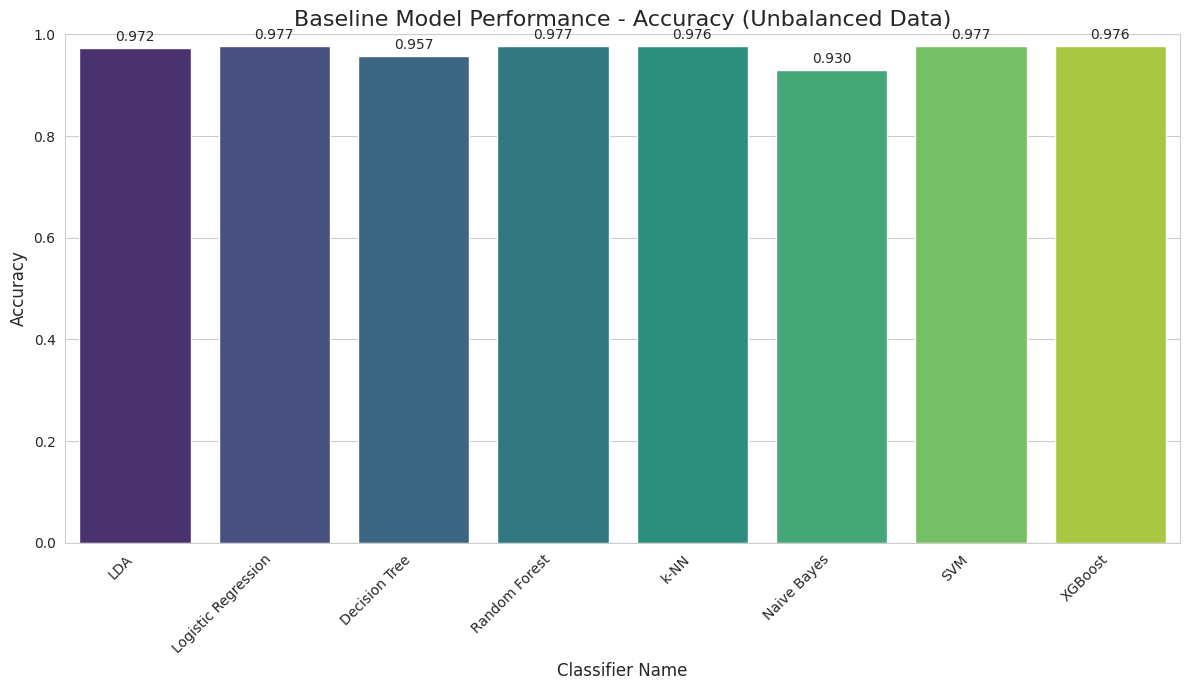

/tmp/ipython-input-1429920306.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Classifier Name', y=metric, data=df_unbalanced_results, palette='viridis')


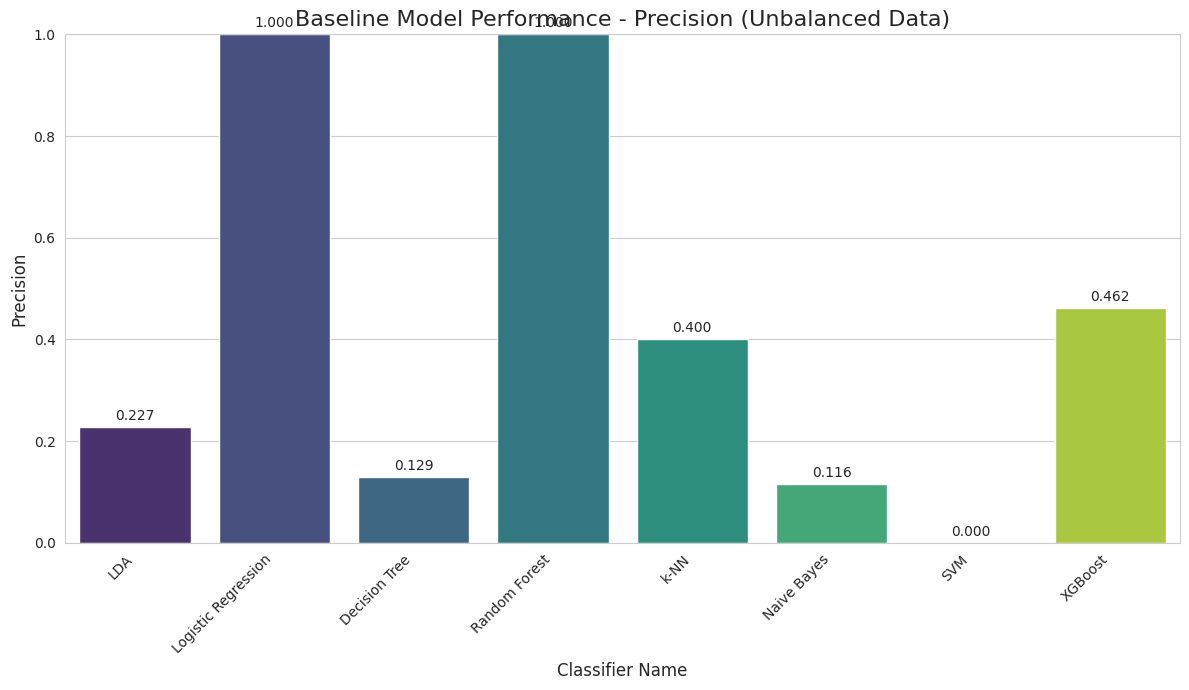

/tmp/ipython-input-1429920306.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Classifier Name', y=metric, data=df_unbalanced_results, palette='viridis')


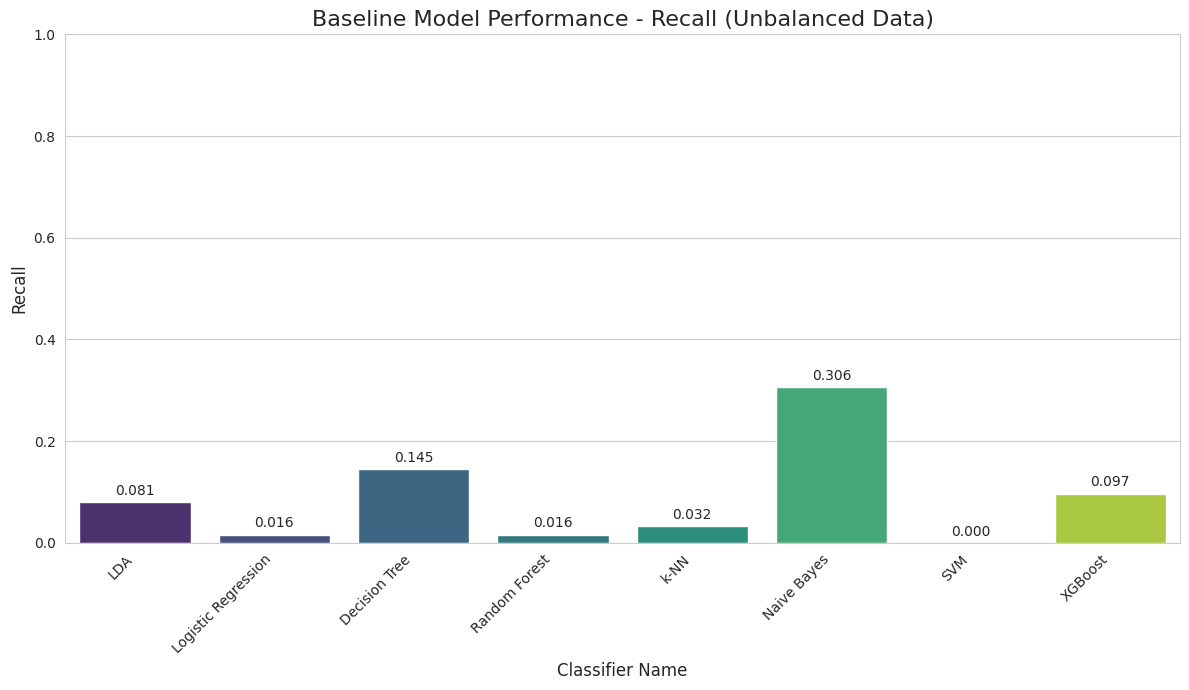

/tmp/ipython-input-1429920306.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Classifier Name', y=metric, data=df_unbalanced_results, palette='viridis')


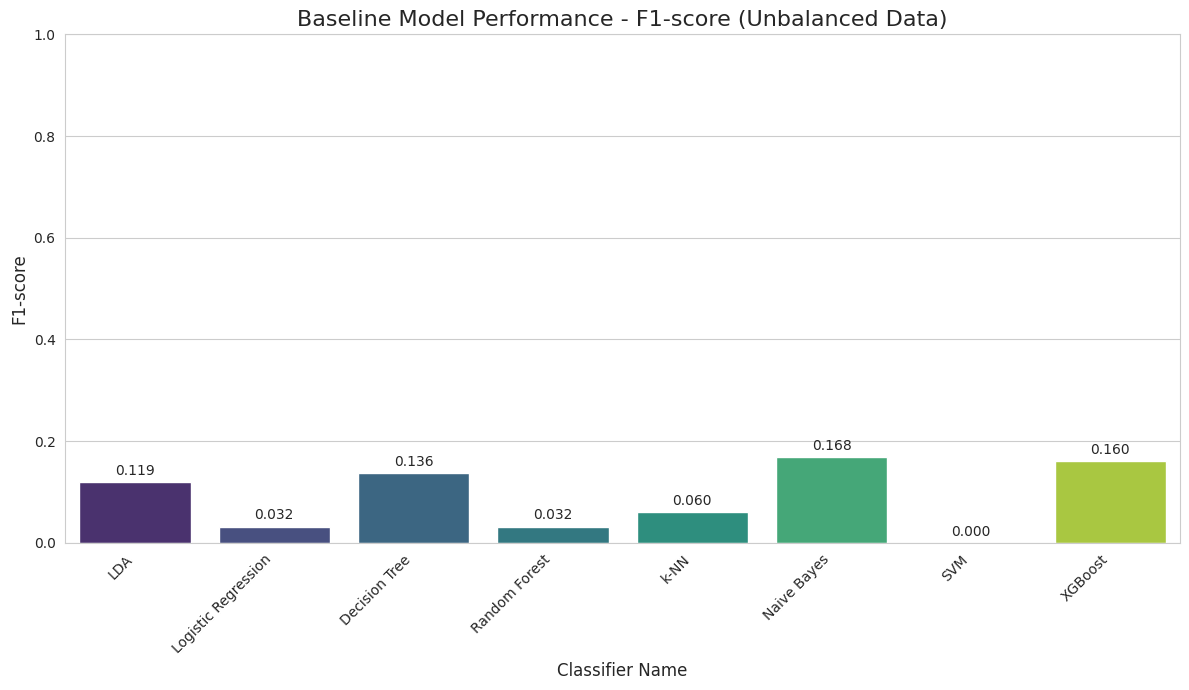

/tmp/ipython-input-1429920306.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Classifier Name', y=metric, data=df_unbalanced_results, palette='viridis')


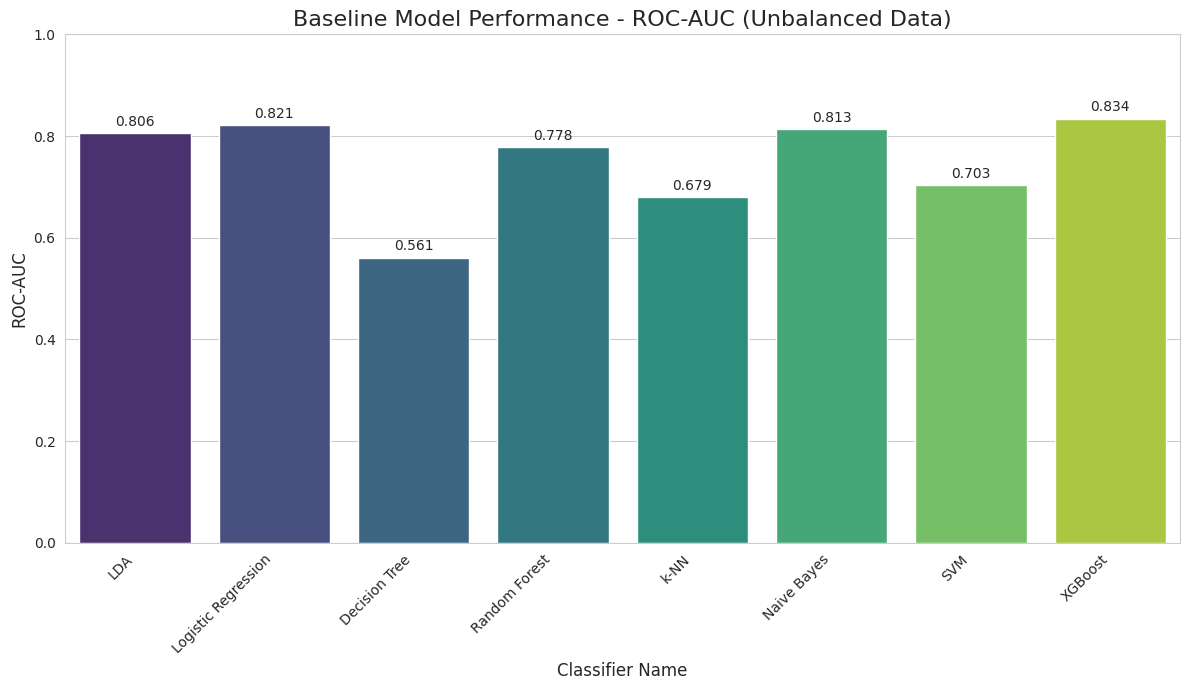

Baseline Model Performance Charts generated successfully.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for machine learning models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Imports for evaluation metrics and splitting
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Define X and y using the already normalized but unbalanced data
X = df_normalized[all_indicator_cols]  # Features (indicators A-K)
y = df_normalized[target_col]          # Target variable (Status)

# 1. Perform a single 75/25 train-test split using stratify=y
X_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Train set class distribution (unbalanced):")
print(y_train_unbalanced.value_counts())
print("\nTest set class distribution (unbalanced):")
print(y_test_unbalanced.value_counts())

# 2. Define the models dictionary (re-using the one from before if available, or redefining for clarity)
models_unbalanced = {
    'LDA': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

unbalanced_results = []

# 3. Iterate through all 8 classifiers and calculate metrics
for name, model in models_unbalanced.items():
    print(f"\nTraining {name} on unbalanced data...")

    # Prepare target variable for model training (XGBoost needs numerical)
    y_train_for_model = y_train_unbalanced
    y_test_for_eval = y_test_unbalanced
    if name == 'XGBoost':
        y_train_for_model = y_train_unbalanced.map({'Healthy': 0, 'Bankrupt': 1})
        y_test_for_eval = y_test_unbalanced.map({'Healthy': 0, 'Bankrupt': 1})

    model.fit(X_train_unbalanced, y_train_for_model)
    y_pred_test = model.predict(X_test_unbalanced)

    y_prob_test = None
    try:
        if hasattr(model, 'predict_proba'):
            y_prob_test = model.predict_proba(X_test_unbalanced)[:, 1]
        elif name == 'SVM' and not model.probability:
            pass # SVM without probability=True won't have predict_proba
    except Exception as e:
        print(f"Warning: Could not get probabilities for {name}: {e}")

    # Calculate metrics
    accuracy = accuracy_score(y_test_for_eval, y_pred_test)
    # Specify pos_label for precision, recall, f1_score based on model type
    pos_label = 1 if name == 'XGBoost' else 'Bankrupt'
    precision = precision_score(y_test_for_eval, y_pred_test, pos_label=pos_label, zero_division=0)
    recall = recall_score(y_test_for_eval, y_pred_test, pos_label=pos_label, zero_division=0)
    f1 = f1_score(y_test_for_eval, y_pred_test, pos_label=pos_label, zero_division=0)

    roc_auc = np.nan
    if y_prob_test is not None:
        try:
            roc_auc = roc_auc_score(y_test_for_eval, y_prob_test)
        except Exception as e:
            print(f"Warning: Could not calculate ROC-AUC for {name}: {e}")

    unbalanced_results.append({
        'Classifier Name': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc
    })

# 4. Store metrics in a Pandas DataFrame called df_unbalanced_results
df_unbalanced_results = pd.DataFrame(unbalanced_results)

# Display the DataFrame as a table
print("\nBaseline Model Performance on Unbalanced Data (Single Split):")
display(df_unbalanced_results)

# Define the metrics to display in the specified order
metrics_to_display = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']

sns.set_style("whitegrid")

# Generate a separate bar chart for each metric
for metric in metrics_to_display:
    plt.figure(figsize=(12, 7))
    bar_plot = sns.barplot(x='Classifier Name', y=metric, data=df_unbalanced_results, palette='viridis')
    plt.title(f'Baseline Model Performance - {metric} (Unbalanced Data)', fontsize=16)
    plt.xlabel('Classifier Name', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.ylim(0, 1) # Ensure Y-axis is between 0 and 1
    plt.xticks(rotation=45, ha='right')

    # Annotate bars with exact scores
    for container in bar_plot.containers:
        bar_plot.bar_label(container, fmt='%.3f', label_type='edge', padding=3)

    plt.tight_layout()
    plt.show()

print("Baseline Model Performance Charts generated successfully.")


ΕΡΩΤΗΜΑ 5 - ΔΗΜΙΟΥΡΓΙΑ 4 Κ-FOLDS

In [13]:
from sklearn.model_selection import StratifiedKFold

X = df_normalized[all_indicator_cols]  # Features (indicators A-K)
y = df_normalized[target_col]          # Target variable (Status)

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

ΕΡΩΤΗΜΑ 6 - 9 ΜΕΣΑ ΣΕ LOOP



 ---------------------------Step 6---------------------------

--------------------------- Fold 1/4 ---------------------------
Train set initial class distribution:
Status
Healthy     7851
Bankrupt     186
Name: count, dtype: int64

Test set class distribution:
Status
Healthy     2617
Bankrupt      62
Name: count, dtype: int64


 ---------------------------Step 7---------------------------

Train set balanced class distribution:
Status
Healthy     558
Bankrupt    186
Name: count, dtype: int64


 ---------------------------Step 8---------------------------
Training LDA for Fold 1...
LDA trained successfully for Fold 1.

--- Step 9.a: Generating Confusion Matrices ---


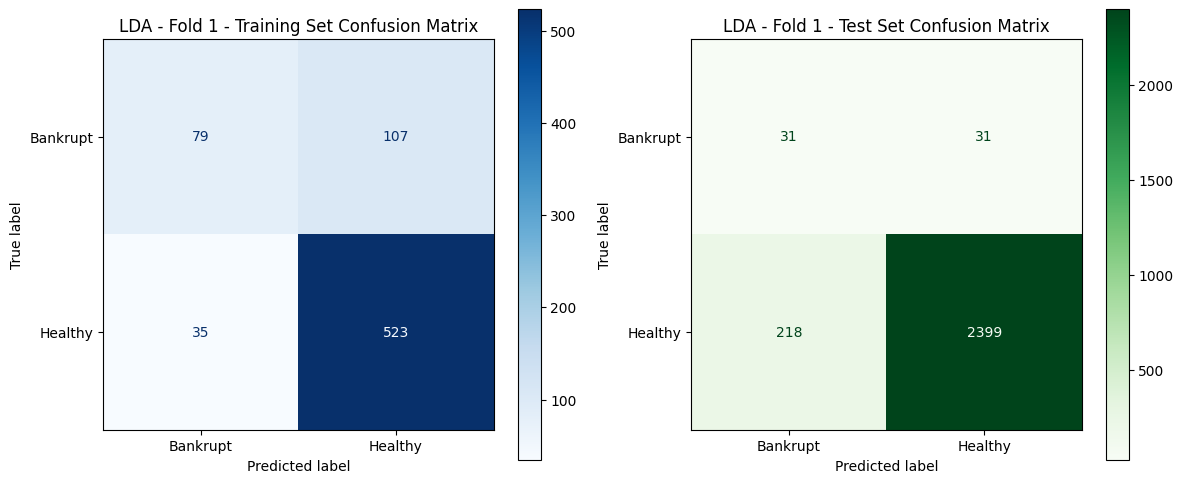


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (LDA):
    Accuracy: 0.81
    Precision: 0.69
    Recall: 0.42
    F1 Score: 0.53
    ROC-AUC: 0.87
    TP: 523, TN: 79, FP: 107, FN: 35
  Test Set (LDA):
    Accuracy: 0.91
    Precision: 0.12
    Recall: 0.50
    F1 Score: 0.20
    ROC-AUC: 0.83
    TP: 2399, TN: 31, FP: 31, FN: 218

--- Step 9.d: Storing results for CSV export ---
Training Logistic Regression for Fold 1...
Logistic Regression trained successfully for Fold 1.

--- Step 9.a: Generating Confusion Matrices ---


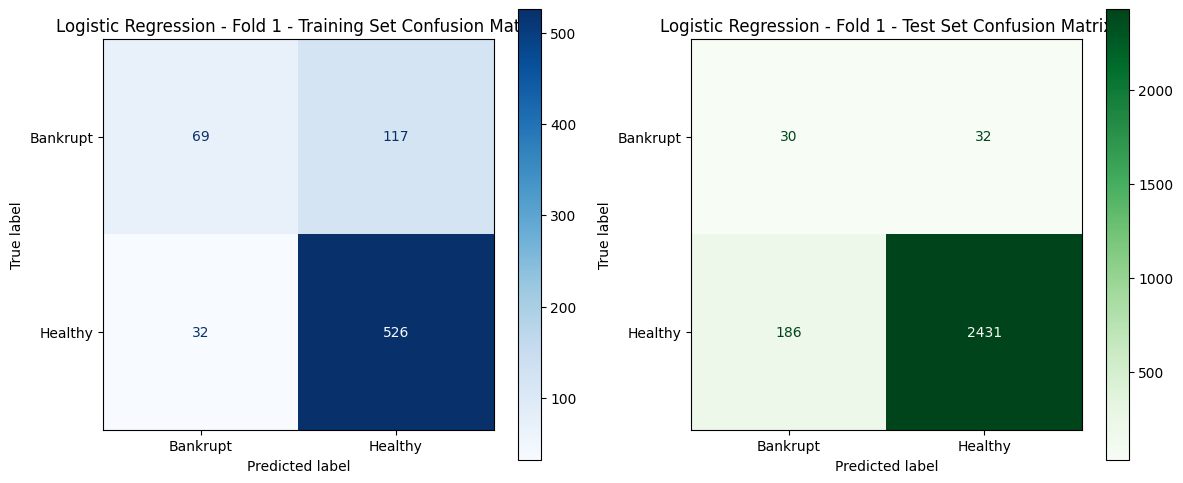


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Logistic Regression):
    Accuracy: 0.80
    Precision: 0.68
    Recall: 0.37
    F1 Score: 0.48
    ROC-AUC: 0.87
    TP: 526, TN: 69, FP: 117, FN: 32
  Test Set (Logistic Regression):
    Accuracy: 0.92
    Precision: 0.14
    Recall: 0.48
    F1 Score: 0.22
    ROC-AUC: 0.83
    TP: 2431, TN: 30, FP: 32, FN: 186

--- Step 9.d: Storing results for CSV export ---
Training Decision Tree for Fold 1...
Decision Tree trained successfully for Fold 1.

--- Step 9.a: Generating Confusion Matrices ---


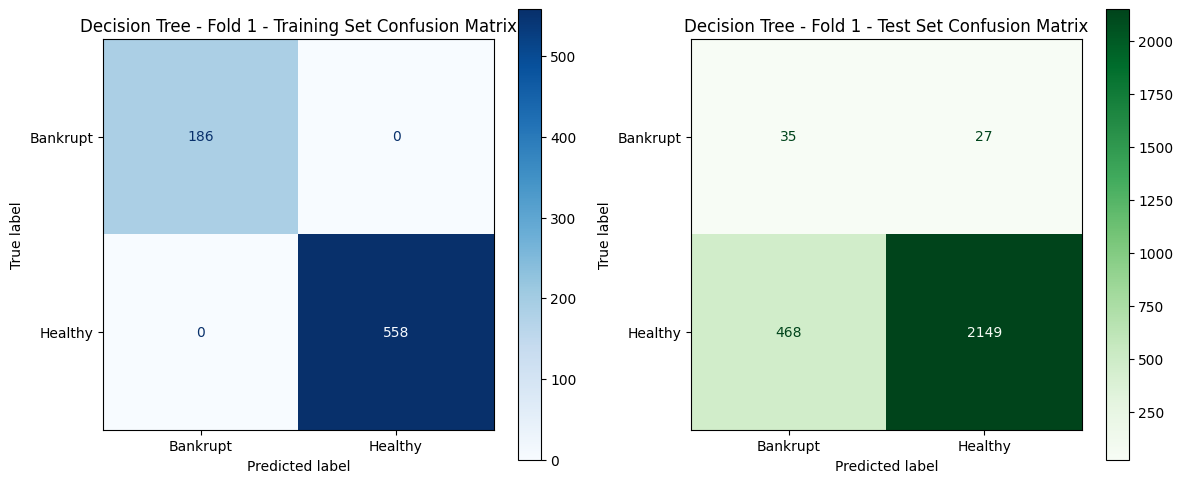


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Decision Tree):
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1 Score: 1.00
    ROC-AUC: 1.00
    TP: 558, TN: 186, FP: 0, FN: 0
  Test Set (Decision Tree):
    Accuracy: 0.82
    Precision: 0.07
    Recall: 0.56
    F1 Score: 0.12
    ROC-AUC: 0.69
    TP: 2149, TN: 35, FP: 27, FN: 468

--- Step 9.d: Storing results for CSV export ---
Training Random Forest for Fold 1...
Random Forest trained successfully for Fold 1.

--- Step 9.a: Generating Confusion Matrices ---


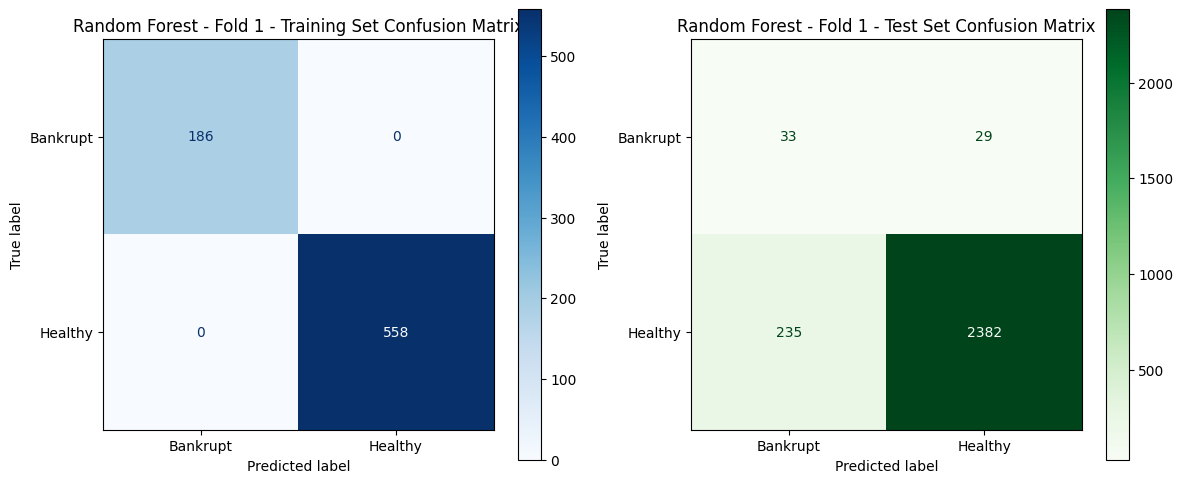


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Random Forest):
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1 Score: 1.00
    ROC-AUC: 1.00
    TP: 558, TN: 186, FP: 0, FN: 0
  Test Set (Random Forest):
    Accuracy: 0.90
    Precision: 0.12
    Recall: 0.53
    F1 Score: 0.20
    ROC-AUC: 0.86
    TP: 2382, TN: 33, FP: 29, FN: 235

--- Step 9.d: Storing results for CSV export ---
Training k-NN for Fold 1...
k-NN trained successfully for Fold 1.

--- Step 9.a: Generating Confusion Matrices ---


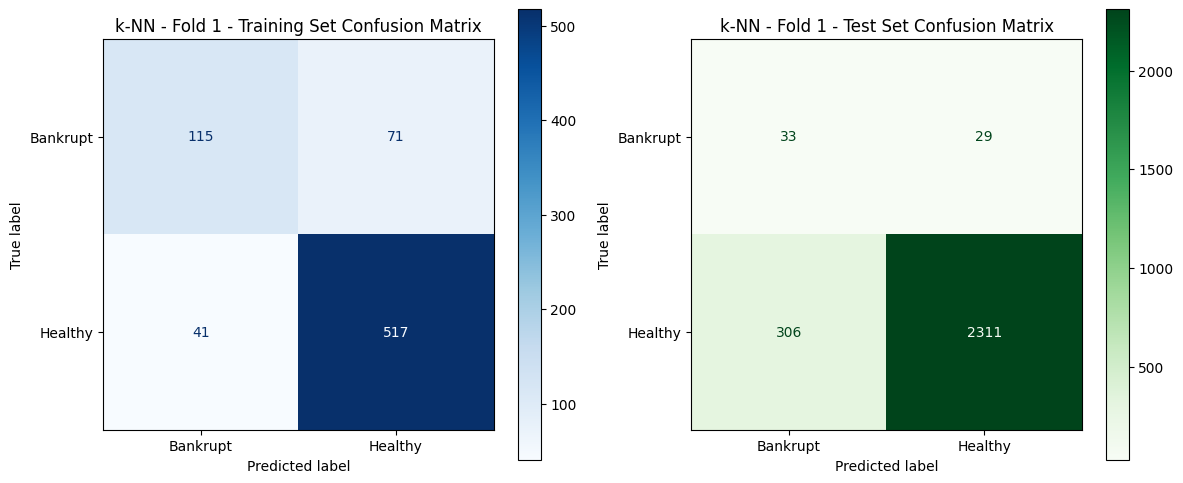


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (k-NN):
    Accuracy: 0.85
    Precision: 0.74
    Recall: 0.62
    F1 Score: 0.67
    ROC-AUC: 0.91
    TP: 517, TN: 115, FP: 71, FN: 41
  Test Set (k-NN):
    Accuracy: 0.87
    Precision: 0.10
    Recall: 0.53
    F1 Score: 0.16
    ROC-AUC: 0.82
    TP: 2311, TN: 33, FP: 29, FN: 306

--- Step 9.d: Storing results for CSV export ---
Training Naive Bayes for Fold 1...
Naive Bayes trained successfully for Fold 1.

--- Step 9.a: Generating Confusion Matrices ---


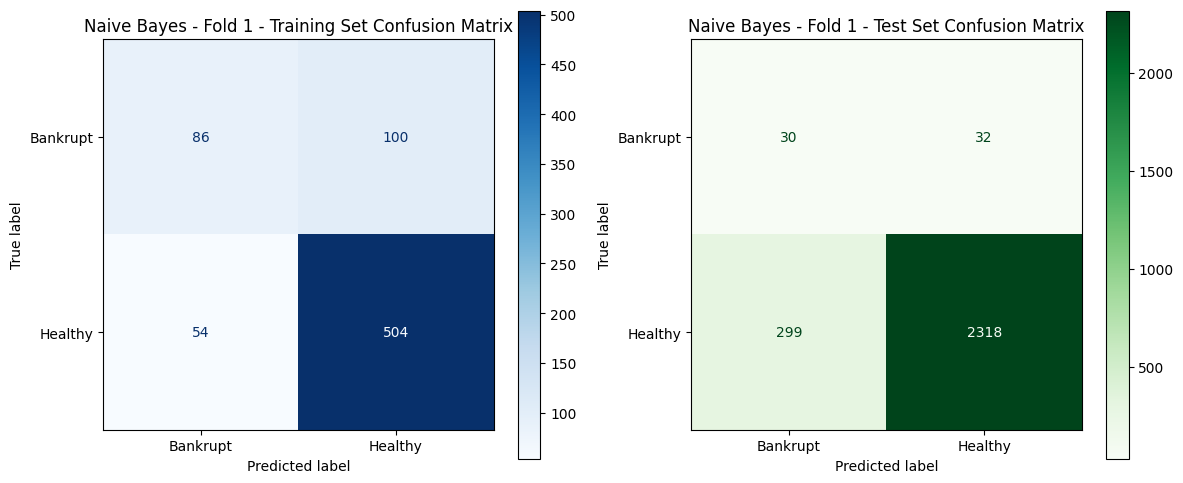


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Naive Bayes):
    Accuracy: 0.79
    Precision: 0.61
    Recall: 0.46
    F1 Score: 0.53
    ROC-AUC: 0.85
    TP: 504, TN: 86, FP: 100, FN: 54
  Test Set (Naive Bayes):
    Accuracy: 0.88
    Precision: 0.09
    Recall: 0.48
    F1 Score: 0.15
    ROC-AUC: 0.82
    TP: 2318, TN: 30, FP: 32, FN: 299

--- Step 9.d: Storing results for CSV export ---
Training SVM for Fold 1...
SVM trained successfully for Fold 1.

--- Step 9.a: Generating Confusion Matrices ---


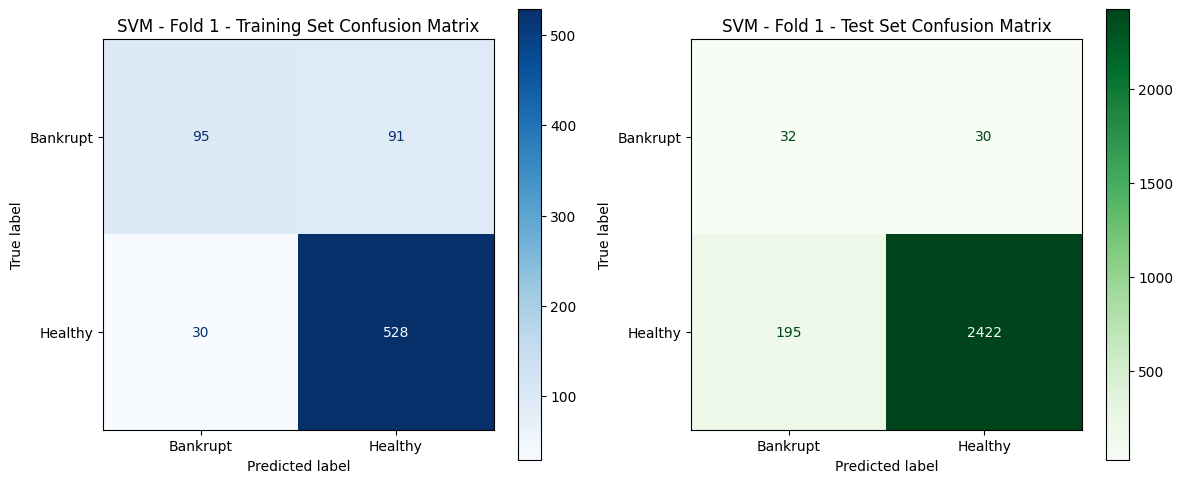


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (SVM):
    Accuracy: 0.84
    Precision: 0.76
    Recall: 0.51
    F1 Score: 0.61
    ROC-AUC: 0.90
    TP: 528, TN: 95, FP: 91, FN: 30
  Test Set (SVM):
    Accuracy: 0.92
    Precision: 0.14
    Recall: 0.52
    F1 Score: 0.22
    ROC-AUC: 0.85
    TP: 2422, TN: 32, FP: 30, FN: 195

--- Step 9.d: Storing results for CSV export ---
Training XGBoost for Fold 1...
XGBoost trained successfully for Fold 1.

--- Step 9.a: Generating Confusion Matrices ---


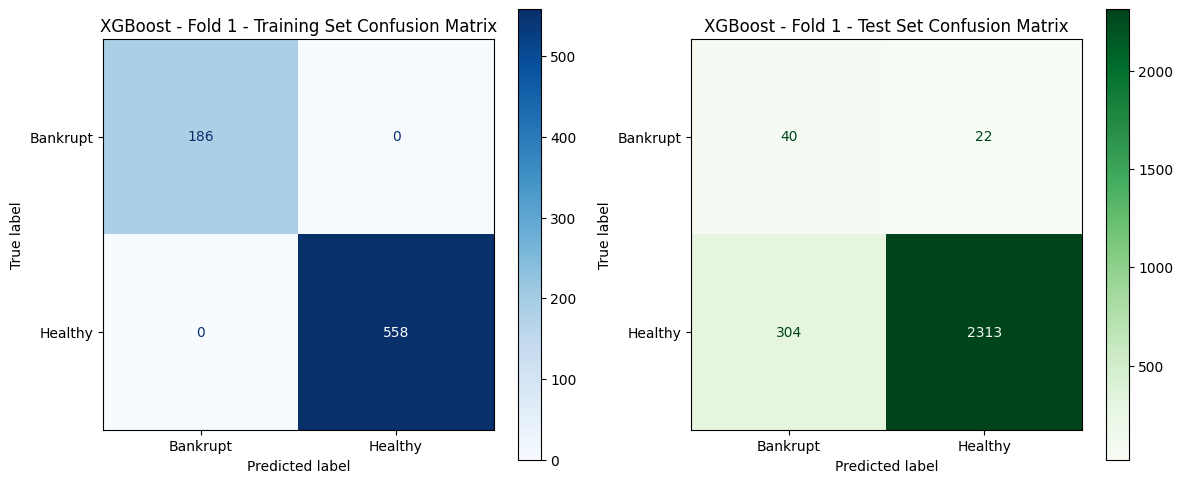


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (XGBoost):
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1 Score: 1.00
    ROC-AUC: 1.00
    TP: 186, TN: 558, FP: 0, FN: 0
  Test Set (XGBoost):
    Accuracy: 0.88
    Precision: 0.12
    Recall: 0.65
    F1 Score: 0.20
    ROC-AUC: 0.84
    TP: 40, TN: 2313, FP: 304, FN: 22

--- Step 9.d: Storing results for CSV export ---


 ---------------------------Step 6---------------------------

--------------------------- Fold 2/4 ---------------------------
Train set initial class distribution:
Status
Healthy     7851
Bankrupt     186
Name: count, dtype: int64

Test set class distribution:
Status
Healthy     2617
Bankrupt      62
Name: count, dtype: int64


 ---------------------------Step 7---------------------------

Train set balanced class distribution:
Status
Healthy     558
Bankrupt    186
Name: count, dtype: int64


 ---------------------------Step 8---------------------------
Training LDA for Fold

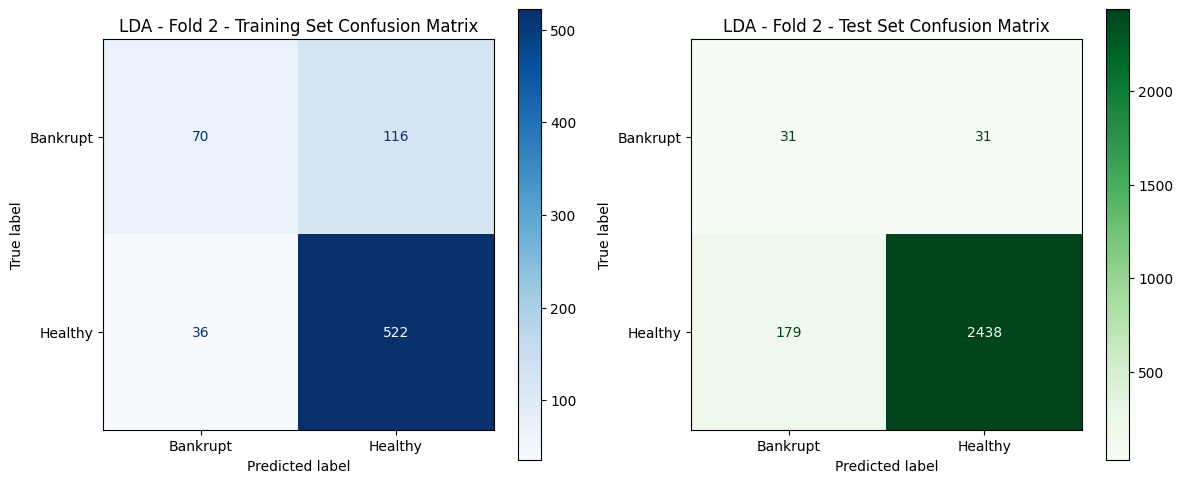


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (LDA):
    Accuracy: 0.80
    Precision: 0.66
    Recall: 0.38
    F1 Score: 0.48
    ROC-AUC: 0.83
    TP: 522, TN: 70, FP: 116, FN: 36
  Test Set (LDA):
    Accuracy: 0.92
    Precision: 0.15
    Recall: 0.50
    F1 Score: 0.23
    ROC-AUC: 0.87
    TP: 2438, TN: 31, FP: 31, FN: 179

--- Step 9.d: Storing results for CSV export ---
Training Logistic Regression for Fold 2...
Logistic Regression trained successfully for Fold 2.

--- Step 9.a: Generating Confusion Matrices ---


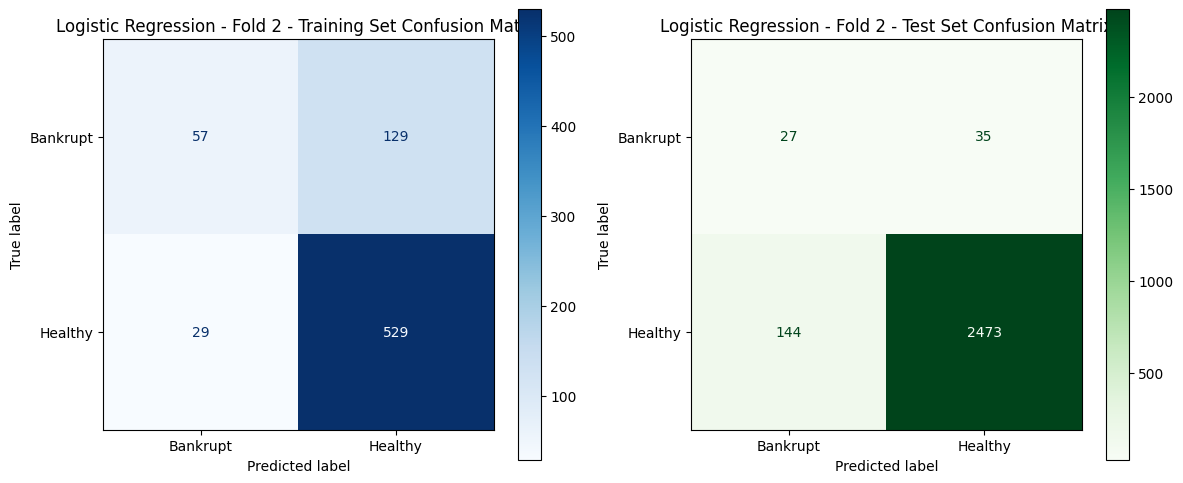


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Logistic Regression):
    Accuracy: 0.79
    Precision: 0.66
    Recall: 0.31
    F1 Score: 0.42
    ROC-AUC: 0.83
    TP: 529, TN: 57, FP: 129, FN: 29
  Test Set (Logistic Regression):
    Accuracy: 0.93
    Precision: 0.16
    Recall: 0.44
    F1 Score: 0.23
    ROC-AUC: 0.86
    TP: 2473, TN: 27, FP: 35, FN: 144

--- Step 9.d: Storing results for CSV export ---
Training Decision Tree for Fold 2...
Decision Tree trained successfully for Fold 2.

--- Step 9.a: Generating Confusion Matrices ---


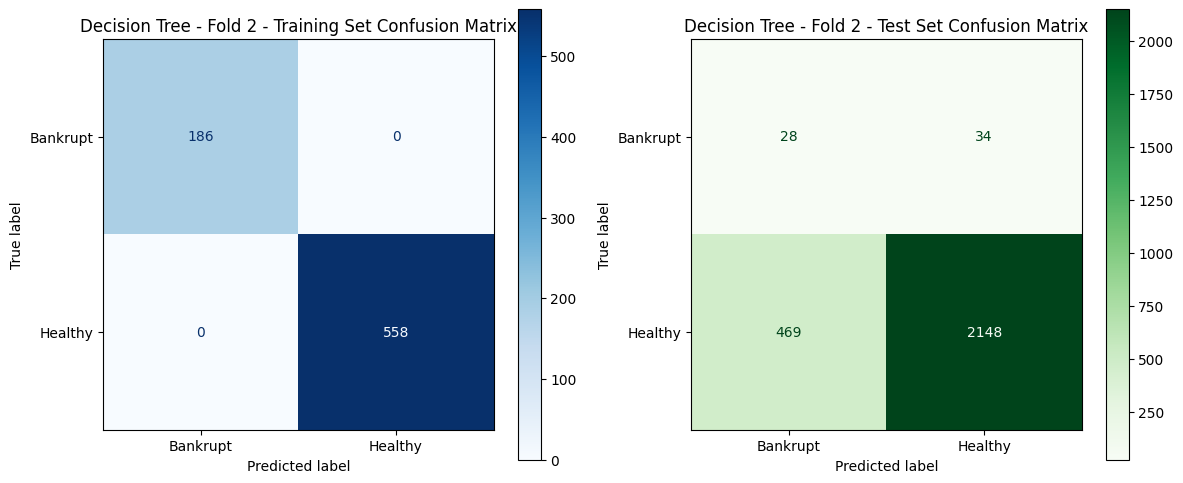


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Decision Tree):
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1 Score: 1.00
    ROC-AUC: 1.00
    TP: 558, TN: 186, FP: 0, FN: 0
  Test Set (Decision Tree):
    Accuracy: 0.81
    Precision: 0.06
    Recall: 0.45
    F1 Score: 0.10
    ROC-AUC: 0.64
    TP: 2148, TN: 28, FP: 34, FN: 469

--- Step 9.d: Storing results for CSV export ---
Training Random Forest for Fold 2...
Random Forest trained successfully for Fold 2.

--- Step 9.a: Generating Confusion Matrices ---


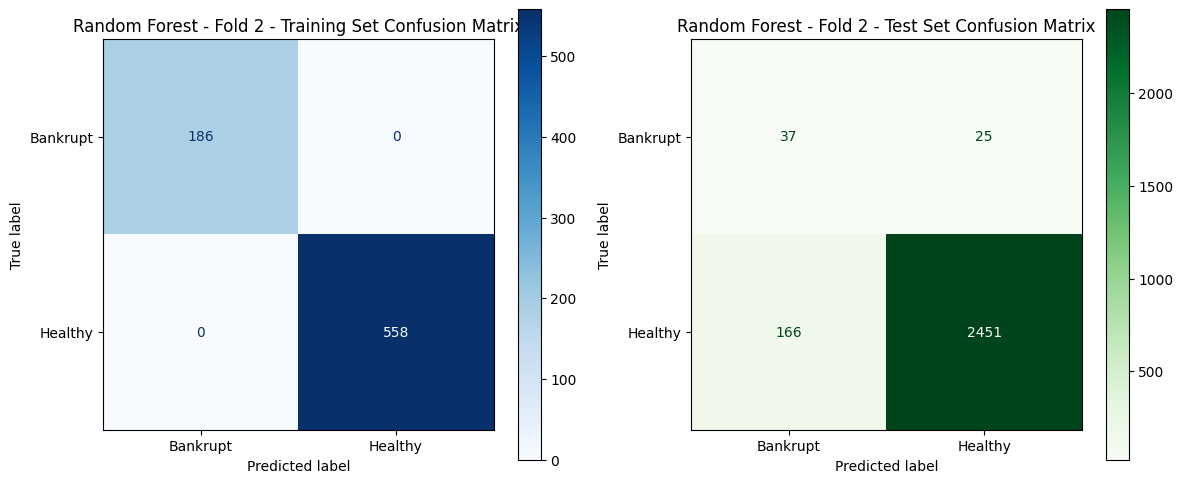


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Random Forest):
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1 Score: 1.00
    ROC-AUC: 1.00
    TP: 558, TN: 186, FP: 0, FN: 0
  Test Set (Random Forest):
    Accuracy: 0.93
    Precision: 0.18
    Recall: 0.60
    F1 Score: 0.28
    ROC-AUC: 0.89
    TP: 2451, TN: 37, FP: 25, FN: 166

--- Step 9.d: Storing results for CSV export ---
Training k-NN for Fold 2...
k-NN trained successfully for Fold 2.

--- Step 9.a: Generating Confusion Matrices ---


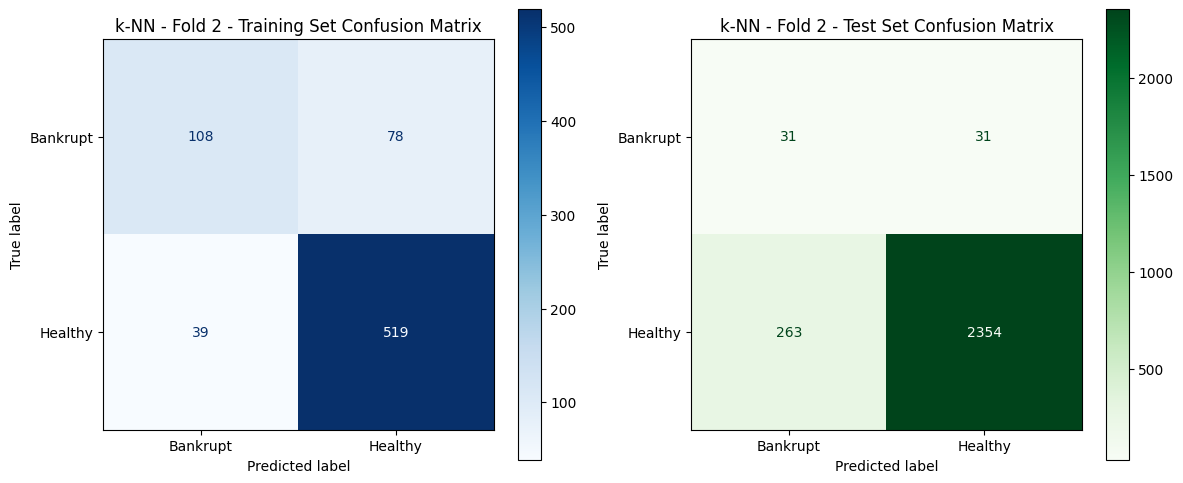


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (k-NN):
    Accuracy: 0.84
    Precision: 0.73
    Recall: 0.58
    F1 Score: 0.65
    ROC-AUC: 0.91
    TP: 519, TN: 108, FP: 78, FN: 39
  Test Set (k-NN):
    Accuracy: 0.89
    Precision: 0.11
    Recall: 0.50
    F1 Score: 0.17
    ROC-AUC: 0.85
    TP: 2354, TN: 31, FP: 31, FN: 263

--- Step 9.d: Storing results for CSV export ---
Training Naive Bayes for Fold 2...
Naive Bayes trained successfully for Fold 2.

--- Step 9.a: Generating Confusion Matrices ---


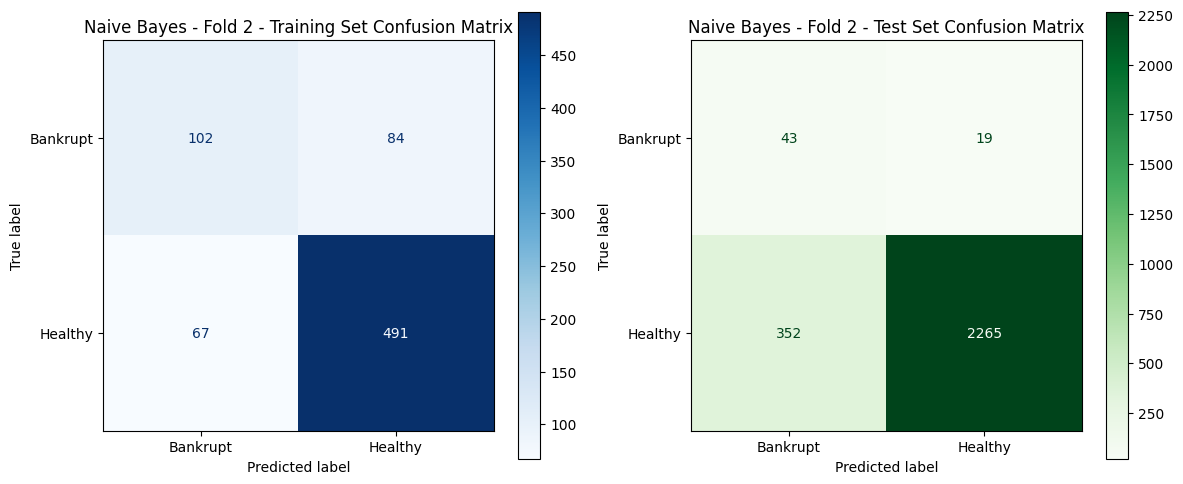


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Naive Bayes):
    Accuracy: 0.80
    Precision: 0.60
    Recall: 0.55
    F1 Score: 0.57
    ROC-AUC: 0.83
    TP: 491, TN: 102, FP: 84, FN: 67
  Test Set (Naive Bayes):
    Accuracy: 0.86
    Precision: 0.11
    Recall: 0.69
    F1 Score: 0.19
    ROC-AUC: 0.84
    TP: 2265, TN: 43, FP: 19, FN: 352

--- Step 9.d: Storing results for CSV export ---
Training SVM for Fold 2...
SVM trained successfully for Fold 2.

--- Step 9.a: Generating Confusion Matrices ---


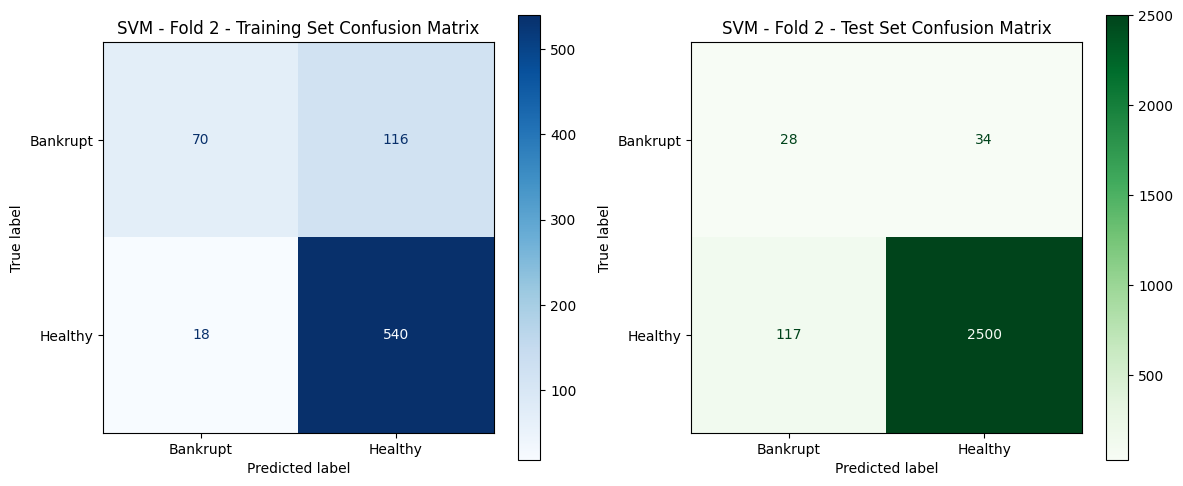


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (SVM):
    Accuracy: 0.82
    Precision: 0.80
    Recall: 0.38
    F1 Score: 0.51
    ROC-AUC: 0.87
    TP: 540, TN: 70, FP: 116, FN: 18
  Test Set (SVM):
    Accuracy: 0.94
    Precision: 0.19
    Recall: 0.45
    F1 Score: 0.27
    ROC-AUC: 0.85
    TP: 2500, TN: 28, FP: 34, FN: 117

--- Step 9.d: Storing results for CSV export ---
Training XGBoost for Fold 2...
XGBoost trained successfully for Fold 2.

--- Step 9.a: Generating Confusion Matrices ---


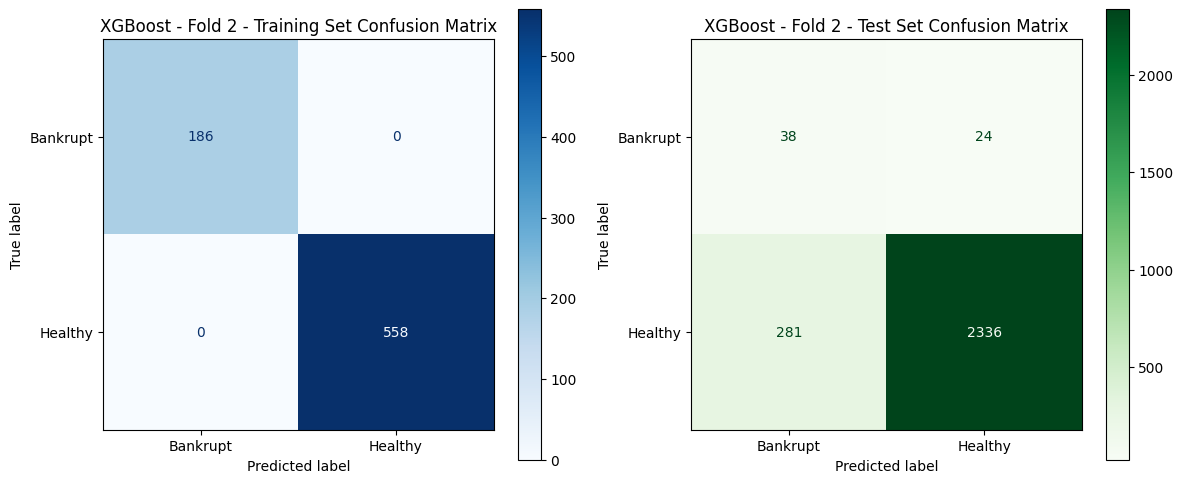


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (XGBoost):
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1 Score: 1.00
    ROC-AUC: 1.00
    TP: 186, TN: 558, FP: 0, FN: 0
  Test Set (XGBoost):
    Accuracy: 0.89
    Precision: 0.12
    Recall: 0.61
    F1 Score: 0.20
    ROC-AUC: 0.86
    TP: 38, TN: 2336, FP: 281, FN: 24

--- Step 9.d: Storing results for CSV export ---


 ---------------------------Step 6---------------------------

--------------------------- Fold 3/4 ---------------------------
Train set initial class distribution:
Status
Healthy     7851
Bankrupt     186
Name: count, dtype: int64

Test set class distribution:
Status
Healthy     2617
Bankrupt      62
Name: count, dtype: int64


 ---------------------------Step 7---------------------------

Train set balanced class distribution:
Status
Healthy     558
Bankrupt    186
Name: count, dtype: int64


 ---------------------------Step 8---------------------------
Training LDA for Fold

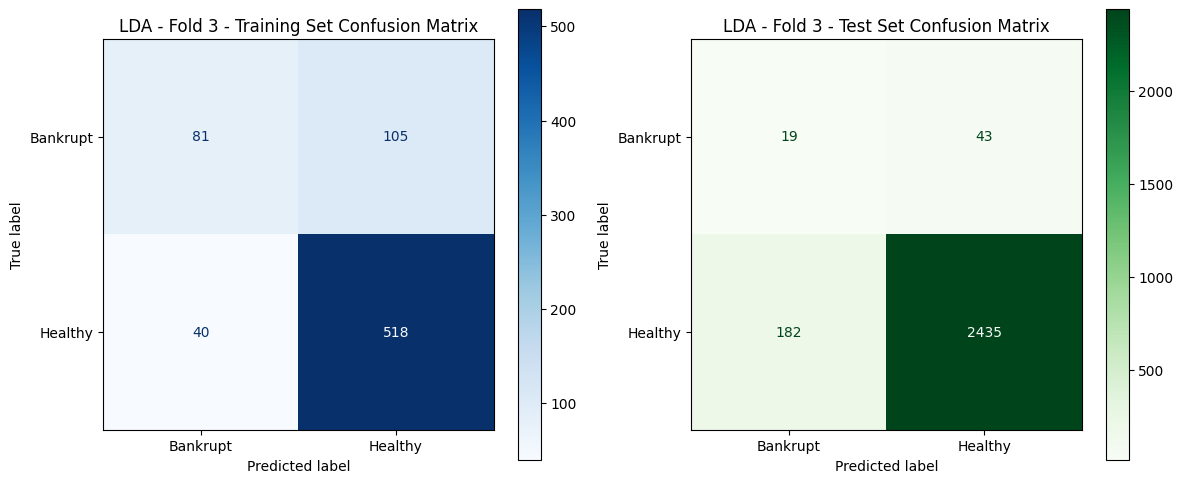


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (LDA):
    Accuracy: 0.81
    Precision: 0.67
    Recall: 0.44
    F1 Score: 0.53
    ROC-AUC: 0.85
    TP: 518, TN: 81, FP: 105, FN: 40
  Test Set (LDA):
    Accuracy: 0.92
    Precision: 0.09
    Recall: 0.31
    F1 Score: 0.14
    ROC-AUC: 0.80
    TP: 2435, TN: 19, FP: 43, FN: 182

--- Step 9.d: Storing results for CSV export ---
Training Logistic Regression for Fold 3...
Logistic Regression trained successfully for Fold 3.

--- Step 9.a: Generating Confusion Matrices ---


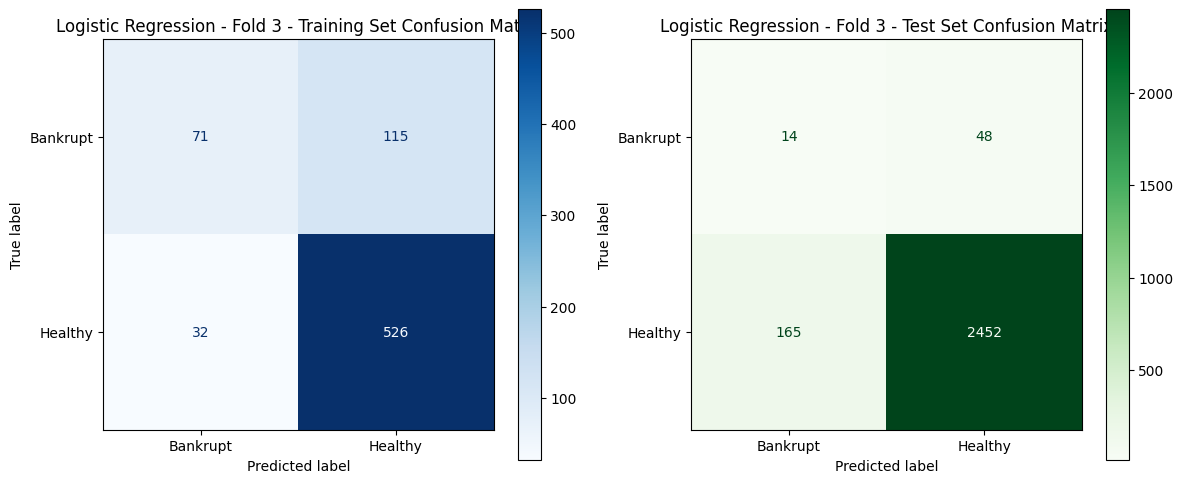


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Logistic Regression):
    Accuracy: 0.80
    Precision: 0.69
    Recall: 0.38
    F1 Score: 0.49
    ROC-AUC: 0.85
    TP: 526, TN: 71, FP: 115, FN: 32
  Test Set (Logistic Regression):
    Accuracy: 0.92
    Precision: 0.08
    Recall: 0.23
    F1 Score: 0.12
    ROC-AUC: 0.80
    TP: 2452, TN: 14, FP: 48, FN: 165

--- Step 9.d: Storing results for CSV export ---
Training Decision Tree for Fold 3...
Decision Tree trained successfully for Fold 3.

--- Step 9.a: Generating Confusion Matrices ---


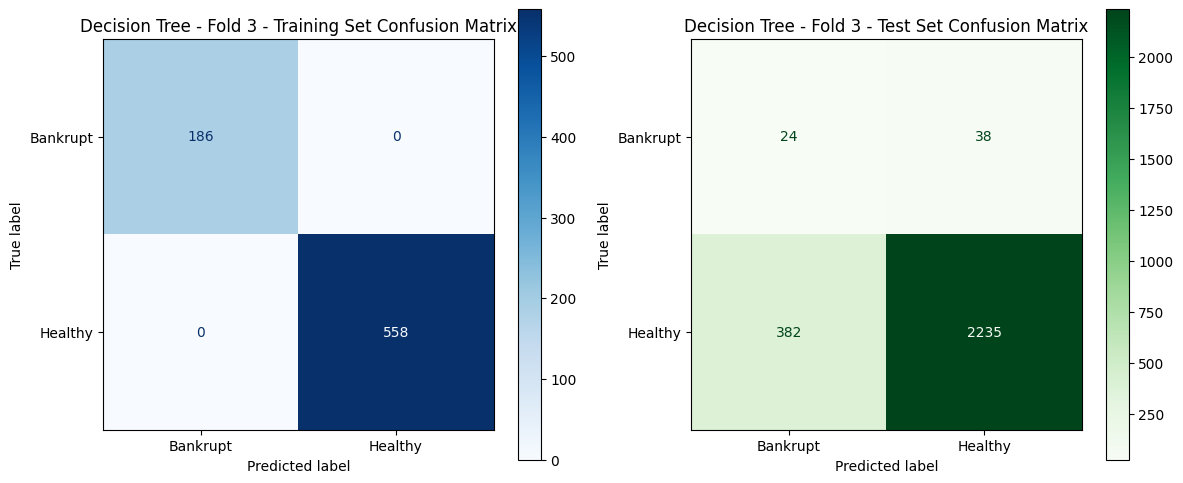


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Decision Tree):
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1 Score: 1.00
    ROC-AUC: 1.00
    TP: 558, TN: 186, FP: 0, FN: 0
  Test Set (Decision Tree):
    Accuracy: 0.84
    Precision: 0.06
    Recall: 0.39
    F1 Score: 0.10
    ROC-AUC: 0.62
    TP: 2235, TN: 24, FP: 38, FN: 382

--- Step 9.d: Storing results for CSV export ---
Training Random Forest for Fold 3...
Random Forest trained successfully for Fold 3.

--- Step 9.a: Generating Confusion Matrices ---


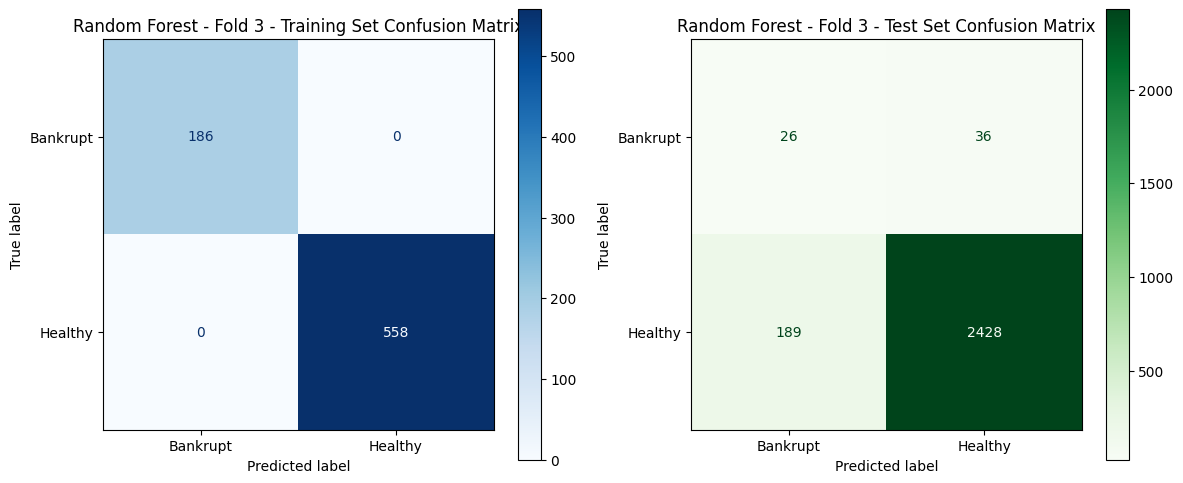


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Random Forest):
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1 Score: 1.00
    ROC-AUC: 1.00
    TP: 558, TN: 186, FP: 0, FN: 0
  Test Set (Random Forest):
    Accuracy: 0.92
    Precision: 0.12
    Recall: 0.42
    F1 Score: 0.19
    ROC-AUC: 0.80
    TP: 2428, TN: 26, FP: 36, FN: 189

--- Step 9.d: Storing results for CSV export ---
Training k-NN for Fold 3...
k-NN trained successfully for Fold 3.

--- Step 9.a: Generating Confusion Matrices ---


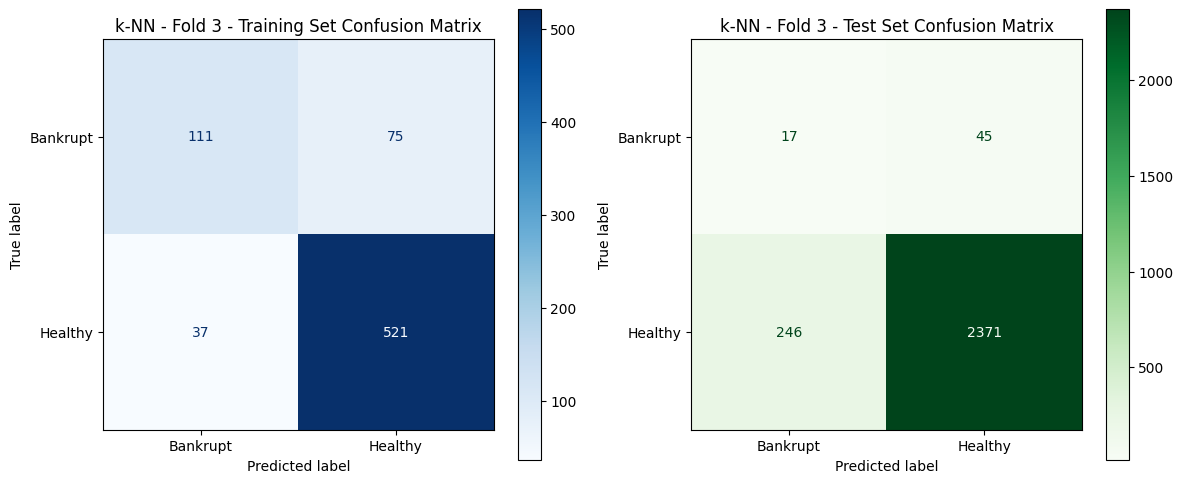


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (k-NN):
    Accuracy: 0.85
    Precision: 0.75
    Recall: 0.60
    F1 Score: 0.66
    ROC-AUC: 0.91
    TP: 521, TN: 111, FP: 75, FN: 37
  Test Set (k-NN):
    Accuracy: 0.89
    Precision: 0.06
    Recall: 0.27
    F1 Score: 0.10
    ROC-AUC: 0.73
    TP: 2371, TN: 17, FP: 45, FN: 246

--- Step 9.d: Storing results for CSV export ---
Training Naive Bayes for Fold 3...
Naive Bayes trained successfully for Fold 3.

--- Step 9.a: Generating Confusion Matrices ---


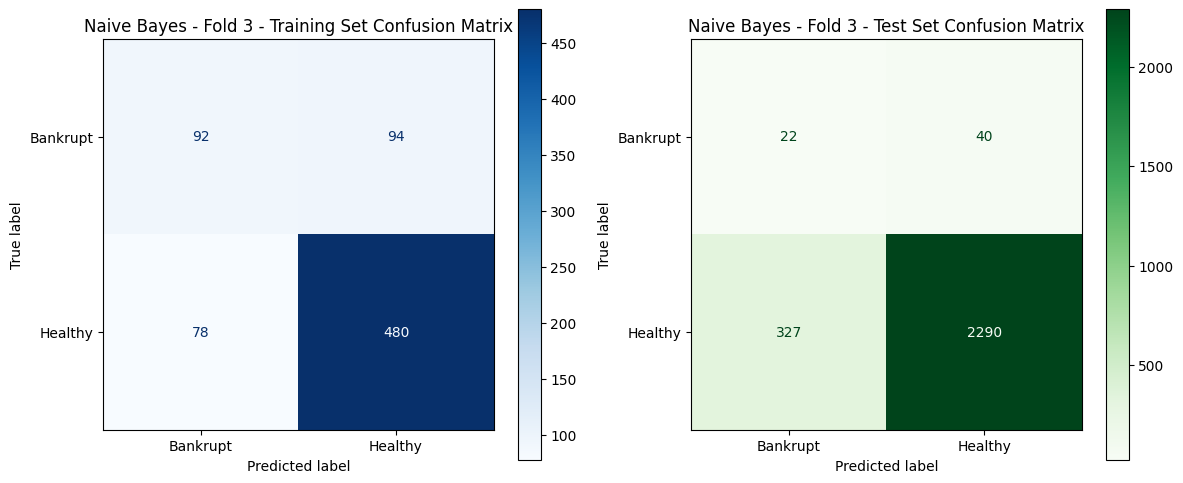


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Naive Bayes):
    Accuracy: 0.77
    Precision: 0.54
    Recall: 0.49
    F1 Score: 0.52
    ROC-AUC: 0.83
    TP: 480, TN: 92, FP: 94, FN: 78
  Test Set (Naive Bayes):
    Accuracy: 0.86
    Precision: 0.06
    Recall: 0.35
    F1 Score: 0.11
    ROC-AUC: 0.77
    TP: 2290, TN: 22, FP: 40, FN: 327

--- Step 9.d: Storing results for CSV export ---
Training SVM for Fold 3...
SVM trained successfully for Fold 3.

--- Step 9.a: Generating Confusion Matrices ---


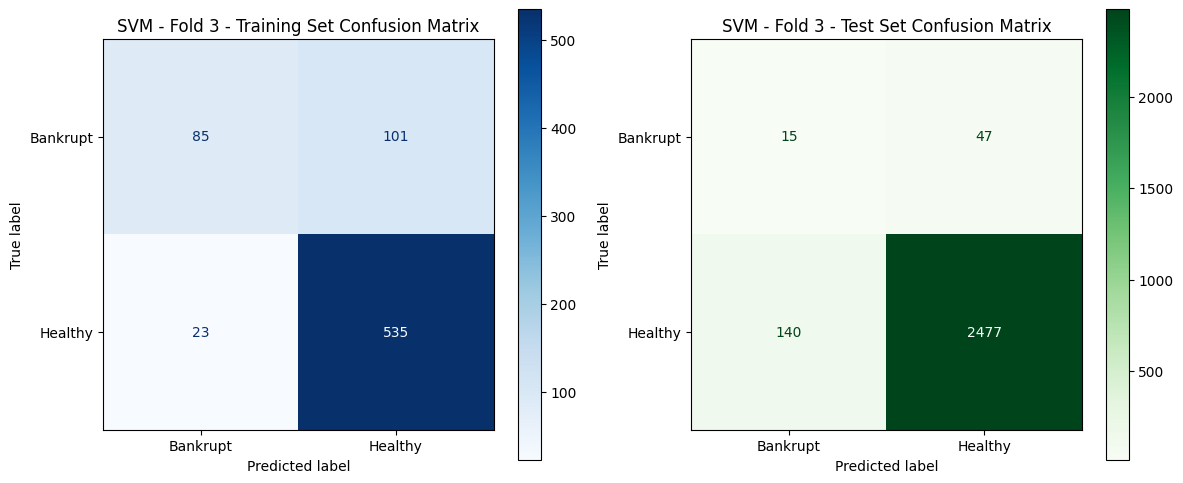


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (SVM):
    Accuracy: 0.83
    Precision: 0.79
    Recall: 0.46
    F1 Score: 0.58
    ROC-AUC: 0.88
    TP: 535, TN: 85, FP: 101, FN: 23
  Test Set (SVM):
    Accuracy: 0.93
    Precision: 0.10
    Recall: 0.24
    F1 Score: 0.14
    ROC-AUC: 0.79
    TP: 2477, TN: 15, FP: 47, FN: 140

--- Step 9.d: Storing results for CSV export ---
Training XGBoost for Fold 3...
XGBoost trained successfully for Fold 3.

--- Step 9.a: Generating Confusion Matrices ---


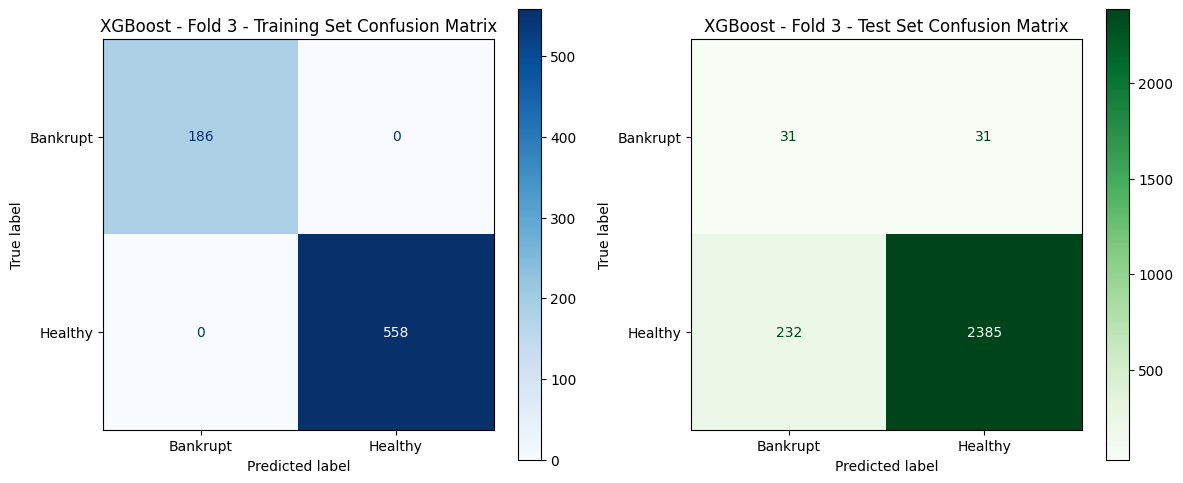


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (XGBoost):
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1 Score: 1.00
    ROC-AUC: 1.00
    TP: 186, TN: 558, FP: 0, FN: 0
  Test Set (XGBoost):
    Accuracy: 0.90
    Precision: 0.12
    Recall: 0.50
    F1 Score: 0.19
    ROC-AUC: 0.79
    TP: 31, TN: 2385, FP: 232, FN: 31

--- Step 9.d: Storing results for CSV export ---


 ---------------------------Step 6---------------------------

--------------------------- Fold 4/4 ---------------------------
Train set initial class distribution:
Status
Healthy     7851
Bankrupt     186
Name: count, dtype: int64

Test set class distribution:
Status
Healthy     2617
Bankrupt      62
Name: count, dtype: int64


 ---------------------------Step 7---------------------------

Train set balanced class distribution:
Status
Healthy     558
Bankrupt    186
Name: count, dtype: int64


 ---------------------------Step 8---------------------------
Training LDA for Fold

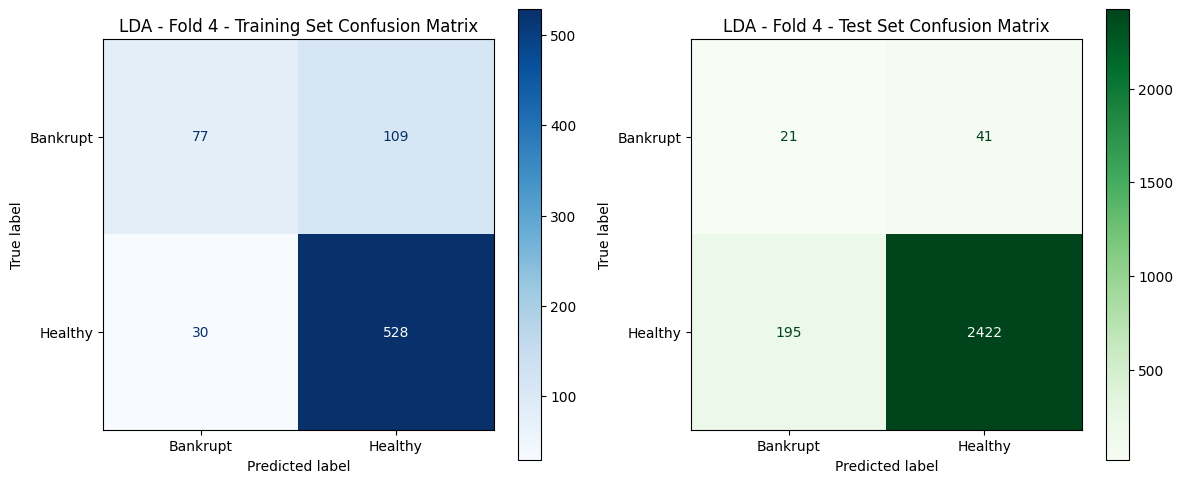


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (LDA):
    Accuracy: 0.81
    Precision: 0.72
    Recall: 0.41
    F1 Score: 0.53
    ROC-AUC: 0.85
    TP: 528, TN: 77, FP: 109, FN: 30
  Test Set (LDA):
    Accuracy: 0.91
    Precision: 0.10
    Recall: 0.34
    F1 Score: 0.15
    ROC-AUC: 0.85
    TP: 2422, TN: 21, FP: 41, FN: 195

--- Step 9.d: Storing results for CSV export ---
Training Logistic Regression for Fold 4...
Logistic Regression trained successfully for Fold 4.

--- Step 9.a: Generating Confusion Matrices ---


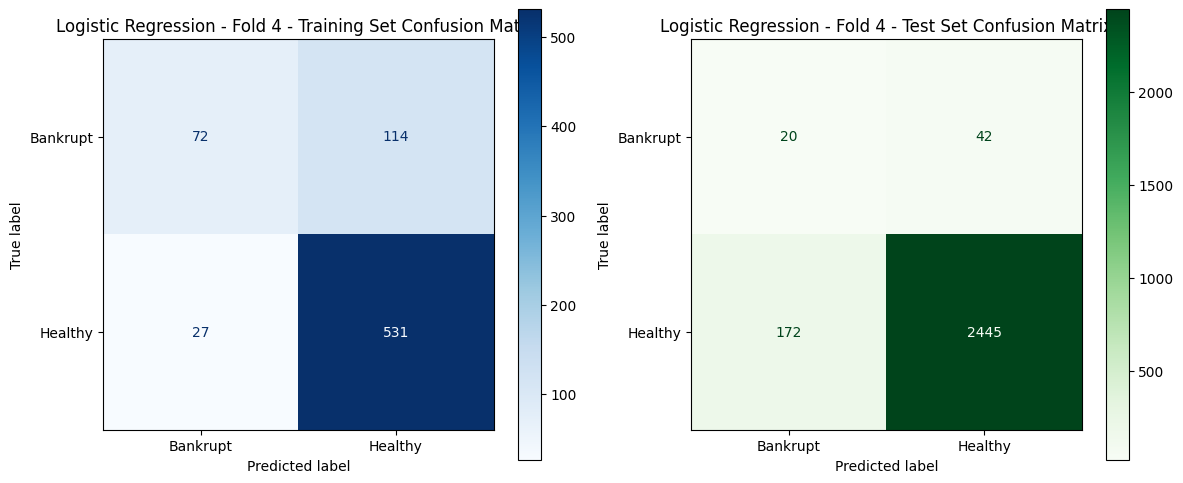


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Logistic Regression):
    Accuracy: 0.81
    Precision: 0.73
    Recall: 0.39
    F1 Score: 0.51
    ROC-AUC: 0.84
    TP: 531, TN: 72, FP: 114, FN: 27
  Test Set (Logistic Regression):
    Accuracy: 0.92
    Precision: 0.10
    Recall: 0.32
    F1 Score: 0.16
    ROC-AUC: 0.85
    TP: 2445, TN: 20, FP: 42, FN: 172

--- Step 9.d: Storing results for CSV export ---
Training Decision Tree for Fold 4...
Decision Tree trained successfully for Fold 4.

--- Step 9.a: Generating Confusion Matrices ---


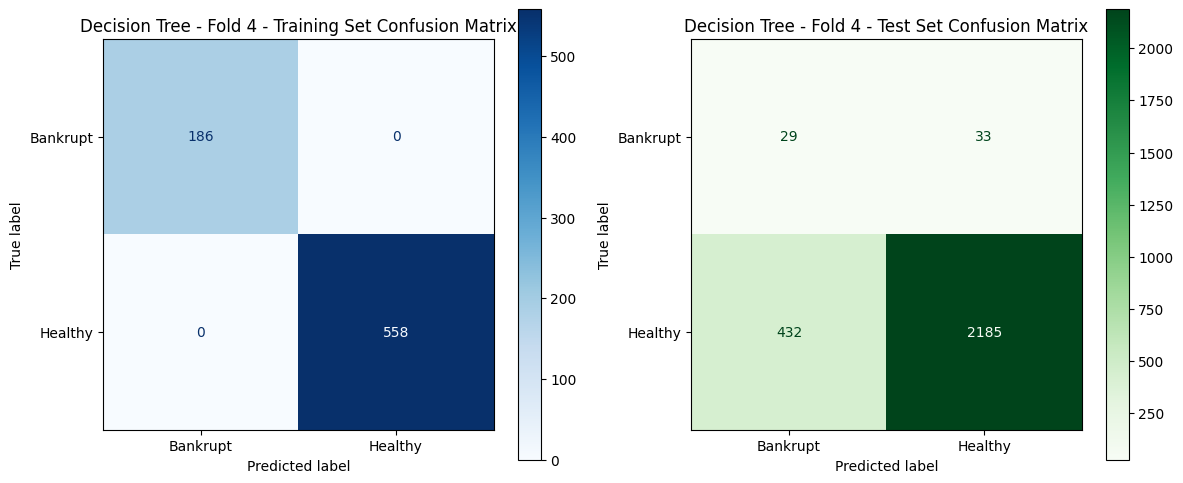


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Decision Tree):
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1 Score: 1.00
    ROC-AUC: 1.00
    TP: 558, TN: 186, FP: 0, FN: 0
  Test Set (Decision Tree):
    Accuracy: 0.83
    Precision: 0.06
    Recall: 0.47
    F1 Score: 0.11
    ROC-AUC: 0.65
    TP: 2185, TN: 29, FP: 33, FN: 432

--- Step 9.d: Storing results for CSV export ---
Training Random Forest for Fold 4...
Random Forest trained successfully for Fold 4.

--- Step 9.a: Generating Confusion Matrices ---


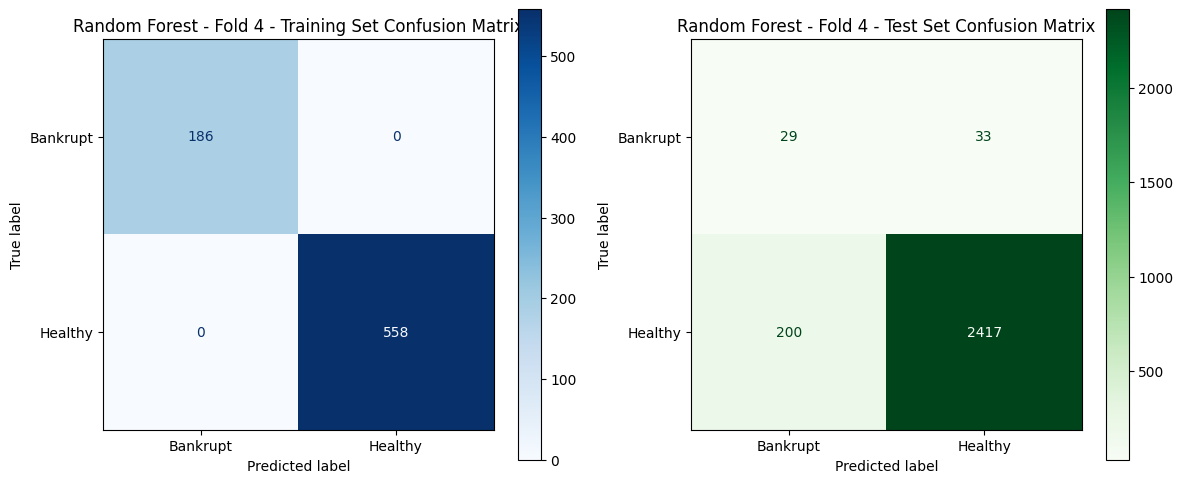


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Random Forest):
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1 Score: 1.00
    ROC-AUC: 1.00
    TP: 558, TN: 186, FP: 0, FN: 0
  Test Set (Random Forest):
    Accuracy: 0.91
    Precision: 0.13
    Recall: 0.47
    F1 Score: 0.20
    ROC-AUC: 0.87
    TP: 2417, TN: 29, FP: 33, FN: 200

--- Step 9.d: Storing results for CSV export ---
Training k-NN for Fold 4...
k-NN trained successfully for Fold 4.

--- Step 9.a: Generating Confusion Matrices ---


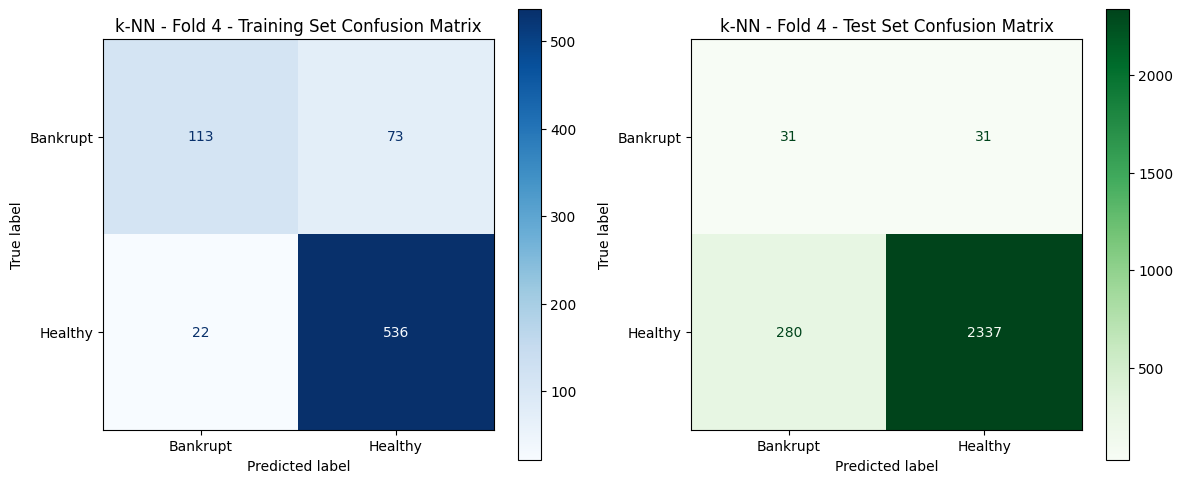


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (k-NN):
    Accuracy: 0.87
    Precision: 0.84
    Recall: 0.61
    F1 Score: 0.70
    ROC-AUC: 0.92
    TP: 536, TN: 113, FP: 73, FN: 22
  Test Set (k-NN):
    Accuracy: 0.88
    Precision: 0.10
    Recall: 0.50
    F1 Score: 0.17
    ROC-AUC: 0.81
    TP: 2337, TN: 31, FP: 31, FN: 280

--- Step 9.d: Storing results for CSV export ---
Training Naive Bayes for Fold 4...
Naive Bayes trained successfully for Fold 4.

--- Step 9.a: Generating Confusion Matrices ---


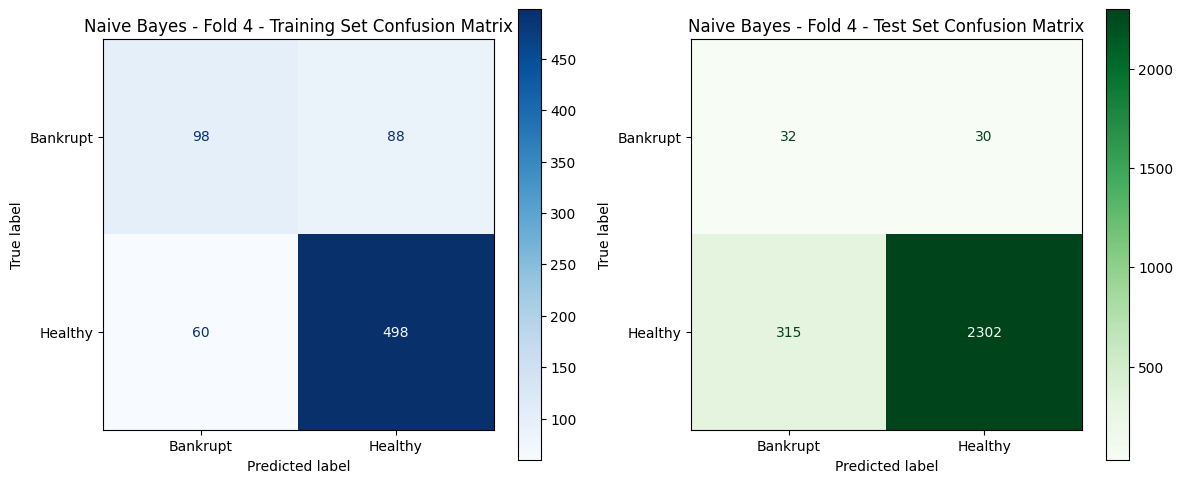


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (Naive Bayes):
    Accuracy: 0.80
    Precision: 0.62
    Recall: 0.53
    F1 Score: 0.57
    ROC-AUC: 0.82
    TP: 498, TN: 98, FP: 88, FN: 60
  Test Set (Naive Bayes):
    Accuracy: 0.87
    Precision: 0.09
    Recall: 0.52
    F1 Score: 0.16
    ROC-AUC: 0.84
    TP: 2302, TN: 32, FP: 30, FN: 315

--- Step 9.d: Storing results for CSV export ---
Training SVM for Fold 4...
SVM trained successfully for Fold 4.

--- Step 9.a: Generating Confusion Matrices ---


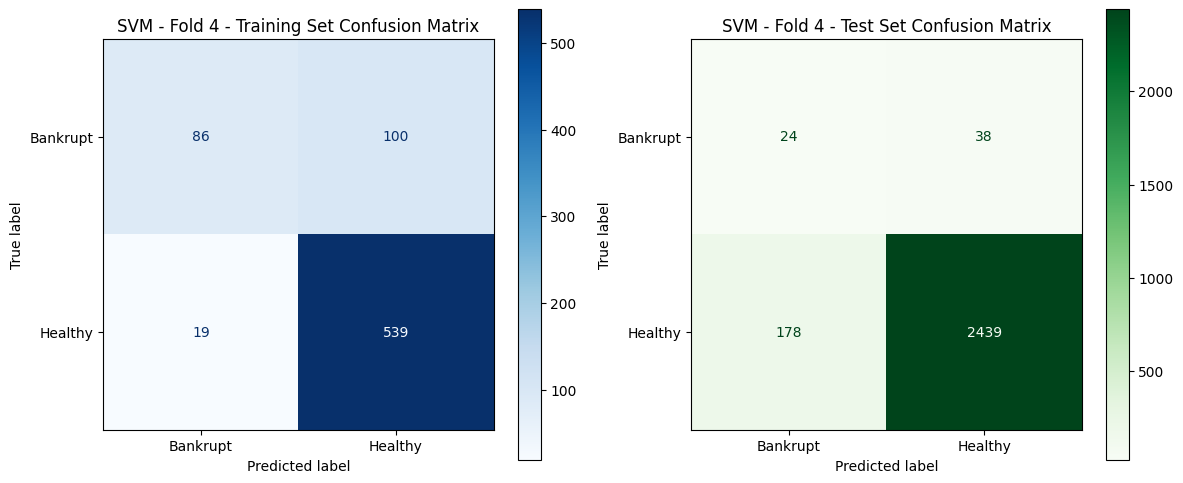


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (SVM):
    Accuracy: 0.84
    Precision: 0.82
    Recall: 0.46
    F1 Score: 0.59
    ROC-AUC: 0.89
    TP: 539, TN: 86, FP: 100, FN: 19
  Test Set (SVM):
    Accuracy: 0.92
    Precision: 0.12
    Recall: 0.39
    F1 Score: 0.18
    ROC-AUC: 0.85
    TP: 2439, TN: 24, FP: 38, FN: 178

--- Step 9.d: Storing results for CSV export ---
Training XGBoost for Fold 4...
XGBoost trained successfully for Fold 4.

--- Step 9.a: Generating Confusion Matrices ---


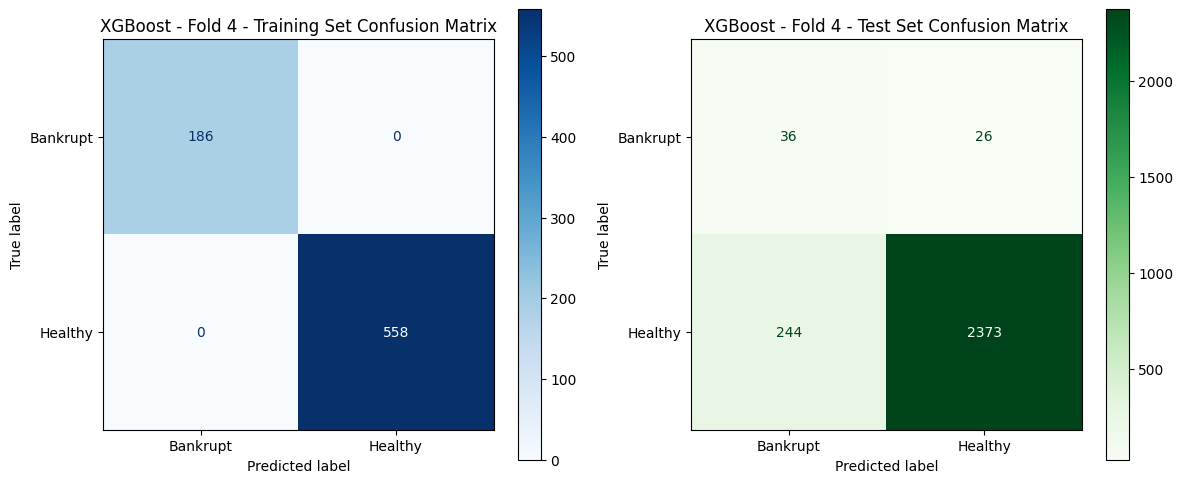


--- Step 9.b & 9.c: Calculating Performance Metrics ---
  Training Set (XGBoost):
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1 Score: 1.00
    ROC-AUC: 1.00
    TP: 186, TN: 558, FP: 0, FN: 0
  Test Set (XGBoost):
    Accuracy: 0.90
    Precision: 0.13
    Recall: 0.58
    F1 Score: 0.21
    ROC-AUC: 0.85
    TP: 36, TN: 2373, FP: 244, FN: 26

--- Step 9.d: Storing results for CSV export ---


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time # Add import time

# Imports for machine learning models (Step 8)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Imports for evaluation metrics (Step 9)
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results_list = []

# Model Dictionary (Step 8)
models = {
    'LDA': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):

    #STEP 6: Print the counts of 'Healthy' and 'Bankrupt' companies for both
    #the Train and Test sets for the current fold.
    print("\n\n ---------------------------Step 6---------------------------")
    print(f"\n--------------------------- Fold {fold+1}/{skf.n_splits} ---------------------------")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print("Train set initial class distribution:")
    print(y_train.value_counts())
    print("\nTest set class distribution:")
    print(y_test.value_counts())

    # STEP 7: Balancing 3 healthy / 1 bankrupt (Refined)
    # Separate classes in the training set
    X_train_healthy = X_train[y_train == 'Healthy']
    y_train_healthy = y_train[y_train == 'Healthy']

    X_train_bankrupt = X_train[y_train == 'Bankrupt']
    y_train_bankrupt = y_train[y_train == 'Bankrupt']

    # Calculate target count for bankrupt companies and set target for healthy companies (3 times bankrupt count)
    num_bankrupt = len(y_train_bankrupt)
    target_healthy_count = num_bankrupt * 3

    # Synchronized Sampling: Get random indices from the healthy training set
    healthy_indices = y_train_healthy.sample(n=target_healthy_count, random_state=42).index

    # Apply these specific indices to create both X_train_healthy_undersampled and y_train_healthy_undersampled
    X_train_healthy_undersampled = X_train_healthy.loc[healthy_indices]
    y_train_healthy_undersampled = y_train_healthy.loc[healthy_indices]

    # Reconstruct the balanced training set by concatenating healthy undersampled with all bankrupt samples
    X_train_balanced_temp = pd.concat([X_train_healthy_undersampled, X_train_bankrupt])
    y_train_balanced_temp = pd.concat([y_train_healthy_undersampled, y_train_bankrupt])

    # Safe Shuffle: Combine X and y into a single DataFrame, then shuffle it using .sample(frac=1)
    combined_balanced_df = pd.concat([X_train_balanced_temp, y_train_balanced_temp], axis=1)
    combined_balanced_df_shuffled = combined_balanced_df.sample(frac=1, random_state=42)

    # Separate X_train_balanced and y_train_balanced from the shuffled DataFrame
    X_train_balanced = combined_balanced_df_shuffled.drop(columns=[target_col])
    y_train_balanced = combined_balanced_df_shuffled[target_col]

    print("\n\n ---------------------------Step 7---------------------------")
    print("\nTrain set balanced class distribution:")
    print(y_train_balanced.value_counts())

    # STEP 8: Model Training
    print("\n\n ---------------------------Step 8---------------------------")
    for name, model in models.items():
        print(f"Training {name} for Fold {fold+1}...")
        y_train_for_model = y_train_balanced
        if name == 'XGBoost':
            # XGBoost requires numerical labels (0 and 1)
            y_train_for_model = y_train_balanced.map({'Healthy': 0, 'Bankrupt': 1})

        start_time = time.time() # Record start time
        # Training
        model.fit(X_train_balanced, y_train_for_model)
        print(f"{name} trained successfully for Fold {fold+1}.")

    # STEP 9: Evaluation and DataFrame entry to finalize the results next.
        # Predictions & Setup
        y_train_eval = y_train_balanced
        y_test_eval = y_test
        if name == 'XGBoost':
            y_train_eval = y_train_balanced.map({'Healthy': 0, 'Bankrupt': 1})
            y_test_eval = y_test.map({'Healthy': 0, 'Bankrupt': 1})

        y_pred_train = model.predict(X_train_balanced)
        y_pred_test = model.predict(X_test)
        end_time = time.time() # Record end time
        duration = end_time - start_time # Calculate duration

        y_prob_train = None
        y_prob_test = None
        try:
            if hasattr(model, 'predict_proba'):
                y_prob_train = model.predict_proba(X_train_balanced)[:, 1] # Probability of 'Bankrupt'
                y_prob_test = model.predict_proba(X_test)[:, 1] # Probability of 'Bankrupt'
            elif name == 'SVM' and not model.probability:
                pass # AUC will not be calculated
        except Exception as e:
            print(f"Warning: Could not get probabilities for {name}: {e}")
            y_prob_train = None
            y_prob_test = None

        # Map predictions back to original labels for Confusion Matrix Display if XGBoost
        if name == 'XGBoost':
            y_pred_train_display = pd.Series(y_pred_train).map({0: 'Healthy', 1: 'Bankrupt'})
            y_pred_test_display = pd.Series(y_pred_test).map({0: 'Healthy', 1: 'Bankrupt'})
        else:
            y_pred_train_display = y_pred_train
            y_pred_test_display = y_pred_test

        # Step 9.a (Confusion Matrices)
        print("\n--- Step 9.a: Generating Confusion Matrices ---")
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        ConfusionMatrixDisplay.from_predictions(y_train_balanced, y_pred_train_display, ax=axes[0], cmap='Blues')
        axes[0].set_title(f'{name} - Fold {fold+1} - Training Set Confusion Matrix')

        ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_display, ax=axes[1], cmap='Greens')
        axes[1].set_title(f'{name} - Fold {fold+1} - Test Set Confusion Matrix')
        plt.tight_layout()
        plt.show()

        # Step 9.b & 9.c (Metrics Calculation)
        print("\n--- Step 9.b & 9.c: Calculating Performance Metrics ---")

        # Metrics for Training Set
        cm_train = confusion_matrix(y_train_eval, y_pred_train)
        tn_train, fp_train, fn_train, tp_train = cm_train.ravel()

        accuracy_train = accuracy_score(y_train_eval, y_pred_train)
        # Specify pos_label for precision, recall, f1_score based on model type
        pos_label_train = 1 if name == 'XGBoost' else 'Bankrupt'
        precision_train = precision_score(y_train_eval, y_pred_train, pos_label=pos_label_train, zero_division=0)
        recall_train = recall_score(y_train_eval, y_pred_train, pos_label=pos_label_train, zero_division=0)
        f1_train = f1_score(y_train_eval, y_pred_train, pos_label=pos_label_train, zero_division=0)

        roc_auc_train = np.nan
        if y_prob_train is not None:
            try:
                roc_auc_train = roc_auc_score(y_train_eval, y_prob_train)
            except Exception as e:
                print(f"Warning: Could not calculate ROC-AUC for training set of {name}: {e}")

        print(f"  Training Set ({name}):")
        print(f"    Accuracy: {accuracy_train:.2f}")
        print(f"    Precision: {precision_train:.2f}")
        print(f"    Recall: {recall_train:.2f}")
        print(f"    F1 Score: {f1_train:.2f}")
        print(f"    ROC-AUC: {roc_auc_train:.2f}" if not np.isnan(roc_auc_train) else "    ROC-AUC: N/A")
        print(f"    TP: {tp_train}, TN: {tn_train}, FP: {fp_train}, FN: {fn_train}")

        # Metrics for Test Set
        cm_test = confusion_matrix(y_test_eval, y_pred_test)
        tn_test, fp_test, fn_test, tp_test = cm_test.ravel()

        accuracy_test = accuracy_score(y_test_eval, y_pred_test)
        pos_label_test = 1 if name == 'XGBoost' else 'Bankrupt'
        precision_test = precision_score(y_test_eval, y_pred_test, pos_label=pos_label_test, zero_division=0)
        recall_test = recall_score(y_test_eval, y_pred_test, pos_label=pos_label_test, zero_division=0)
        f1_test = f1_score(y_test_eval, y_pred_test, pos_label=pos_label_test, zero_division=0)

        roc_auc_test = np.nan
        if y_prob_test is not None:
            try:
                roc_auc_test = roc_auc_score(y_test_eval, y_prob_test)
            except Exception as e:
                print(f"Warning: Could not calculate ROC-AUC for test set of {name}: {e}")

        print(f"  Test Set ({name}):")
        print(f"    Accuracy: {accuracy_test:.2f}")
        print(f"    Precision: {precision_test:.2f}")
        print(f"    Recall: {recall_test:.2f}")
        print(f"    F1 Score: {f1_test:.2f}")
        print(f"    ROC-AUC: {roc_auc_test:.2f}" if not np.isnan(roc_auc_test) else "    ROC-AUC: N/A")
        print(f"    TP: {tp_test}, TN: {tn_test}, FP: {fp_test}, FN: {fn_test}")


        # Step 9.d (Data Recording)
        print("\n--- Step 9.d: Storing results for CSV export ---")

        # Training set results
        results_list.append({
            'Classifier Name': name,
            'Training or test set': 'Training set',
            'Balanced or unbalanced train set': 'Balanced',
            'Number of training samples': len(y_train_balanced),
            'Number of non-healthy companies in training sample': num_bankrupt,
            'TP': tp_train,
            'TN': tn_train,
            'FP': fp_train,
            'FN': fn_train,
            'ROC-AUC': roc_auc_train,
            'Execution Time (sec)': duration # Add execution time
        })

        # Test set results
        results_list.append({
            'Classifier Name': name,
            'Training or test set': 'Test set',
            'Balanced or unbalanced train set': 'Balanced', # Refers to the training set used to train the model
            'Number of training samples': len(y_train_balanced), # Still refers to the training sample size
            'Number of non-healthy companies in training sample': num_bankrupt,
            'TP': tp_test,
            'TN': tn_test,
            'FP': fp_test,
            'FN': fn_test,
            'ROC-AUC': roc_auc_test,
            'Execution Time (sec)': duration # Add execution time
        })


TIME FOR EACH OF THE 8 METHODS

/tmp/ipython-input-442955573.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Classifier Name', y='Execution Time (sec)', data=df_time, palette='viridis')


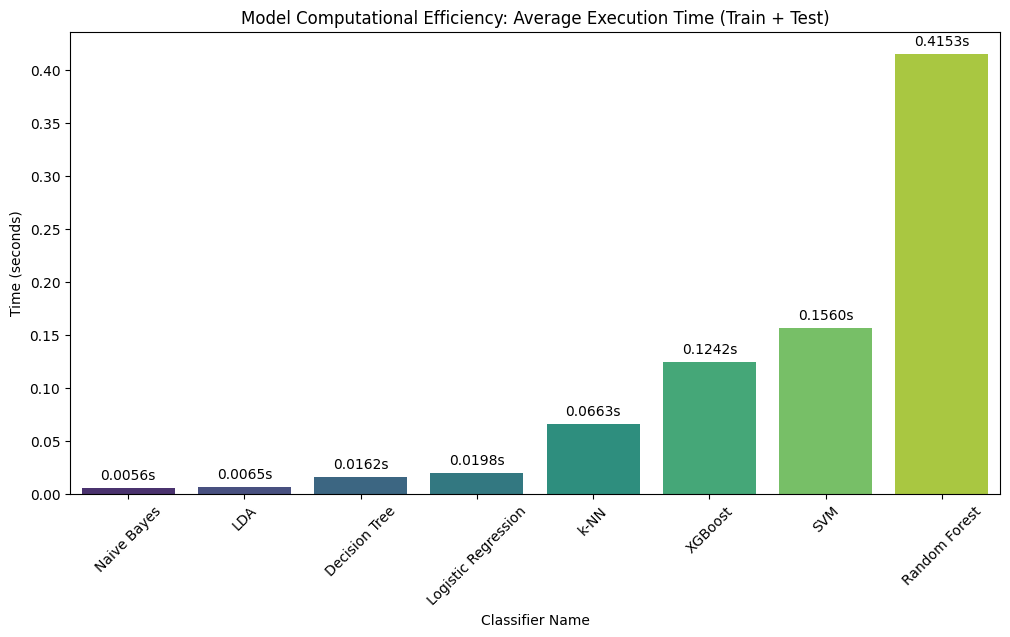

In [15]:
import seaborn as sns

# Μετατροπή των αποτελεσμάτων σε DataFrame
df_results = pd.DataFrame(results_list)

# Υπολογισμός μέσου χρόνου ανά μοντέλο
df_time = df_results.groupby('Classifier Name')['Execution Time (sec)'].mean().sort_values().reset_index()

# Δημιουργία γραφήματος
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Classifier Name', y='Execution Time (sec)', data=df_time, palette='viridis')

# Προσθήκη ετικετών με τον ακριβή χρόνο πάνω από κάθε μπάρα
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}s',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Model Computational Efficiency: Average Execution Time (Train + Test)')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.show()

ΜΕΤΡΙΚΕΣ ΓΙΑ ΚΑΘΕ ΜΟΝΤΕΛΟ -  CHARTS


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results_list to a DataFrame
df_results = pd.DataFrame(results_list)

# Calculate additional metrics, handling potential ZeroDivisionError
def calculate_metrics(row):
    tp = row['TP']
    tn = row['TN']
    fp = row['FP']
    fn = row['FN']

    # Accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else np.nan

    # Precision
    precision = tp / (tp + fp) if (tp + fp) > 0 else np.nan

    # Recall
    recall = tp / (tp + fn) if (tp + fn) > 0 else np.nan

    # F1-score
    if not np.isnan(precision) and not np.isnan(recall) and (precision + recall) > 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
    else:
        f1_score = np.nan

    return pd.Series({
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1_score
    })

df_calculated_metrics = df_results.apply(calculate_metrics, axis=1)

# Concatenate calculated metrics with the original DataFrame
df_results_full = pd.concat([df_results, df_calculated_metrics], axis=1)

# Group by Classifier Name and Training/Test set and calculate the mean for all metrics
metrics_to_average = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
df_avg_results = df_results_full.groupby(['Classifier Name', 'Training or test set'])[metrics_to_average].mean(numeric_only=True).reset_index()

print("Average metrics across all folds:")
display(df_avg_results.head(16))


Average metrics across all folds:


,Classifier Name,Training or test set,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Decision Tree,Test set,0.824281,0.985103,0.832728,0.902462,0.650235
1,Decision Tree,Training set,1.000000,1.000000,1.000000,1.000000,1.000000
2,LDA,Test set,0.914147,0.985172,0.926060,0.954689,0.836251
3,LDA,Training set,0.805780,0.827172,0.936828,0.878571,0.849727
4,Logistic Regression,Test set,0.923106,0.984241,0.936282,0.959651,0.833949
5,Logistic Regression,Training set,0.800067,0.816460,0.946237,0.876548,0.847398
6,Naive Bayes,Test set,0.868048,0.987008,0.876481,0.928441,0.819373
7,Naive Bayes,Training set,0.789987,0.843604,0.883961,0.863220,0.831291
8,Random Forest,Test set,0.914800,0.987449,0.924532,0.954931,0.855070
9,Random Forest,Training set,1.000000,1.000000,1.000000,1.000000,1.000000


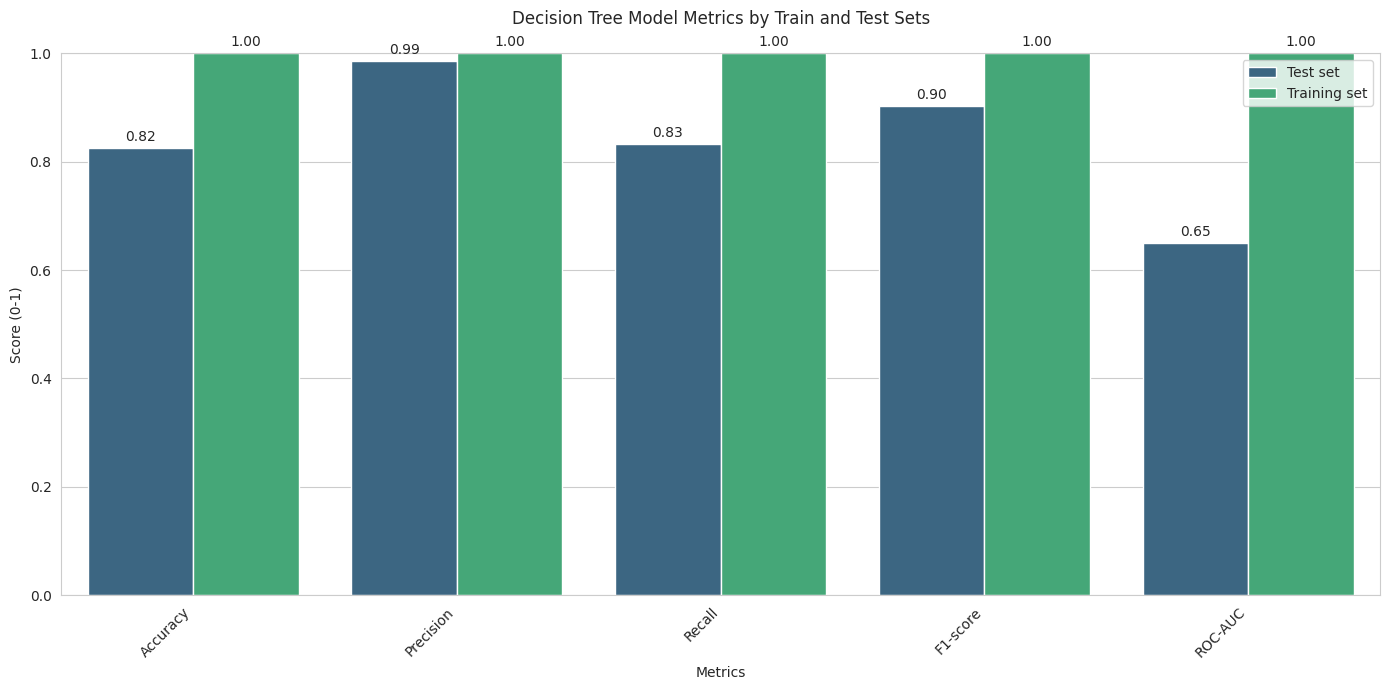

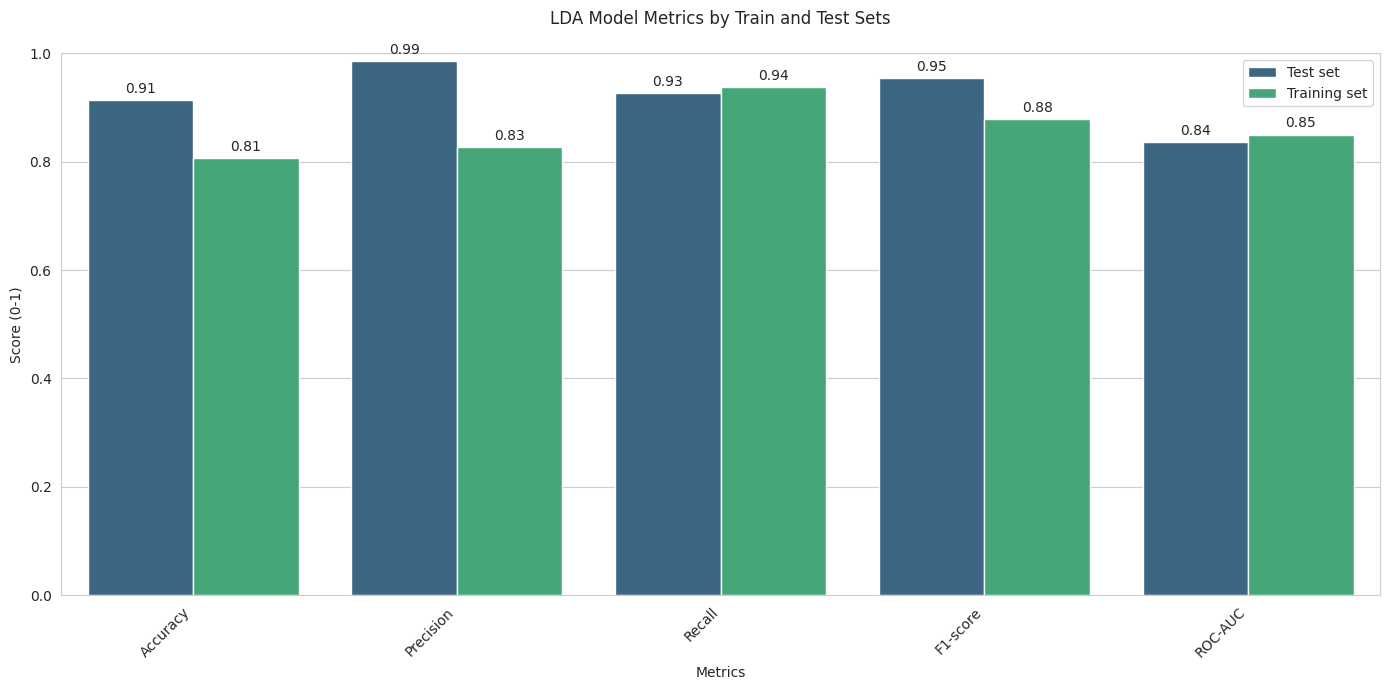

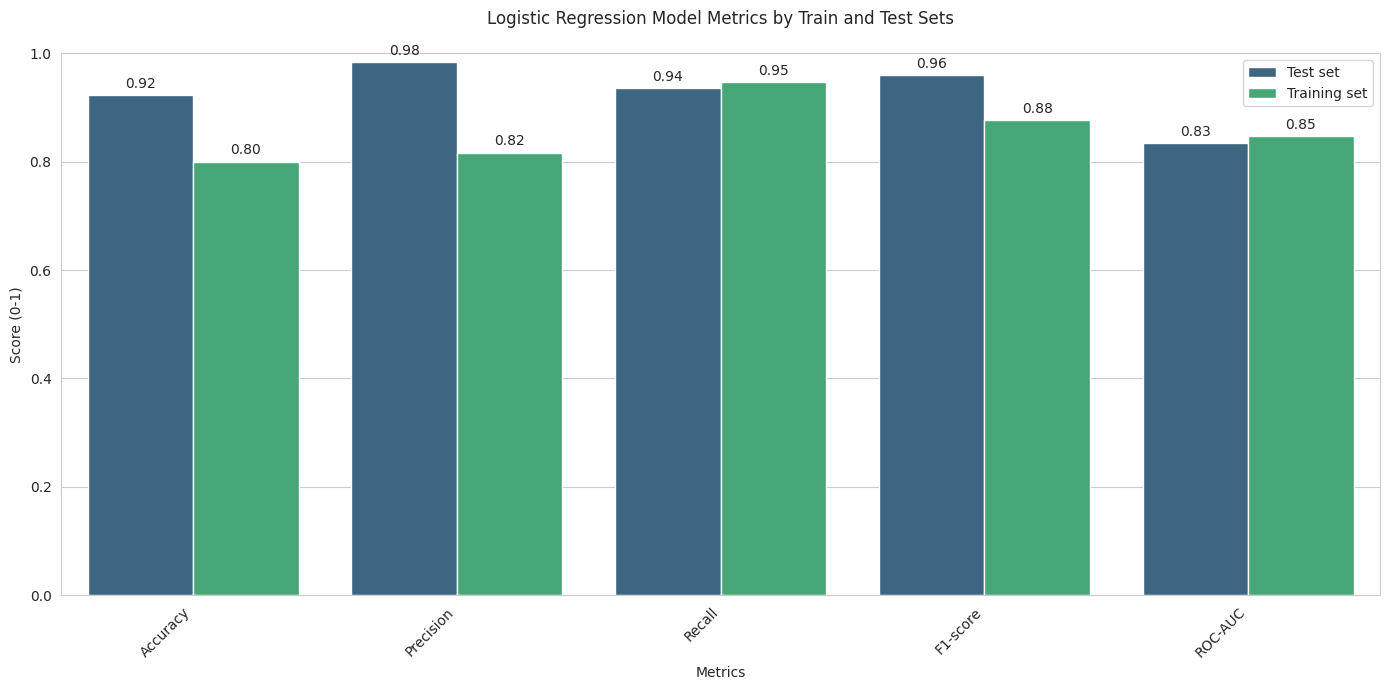

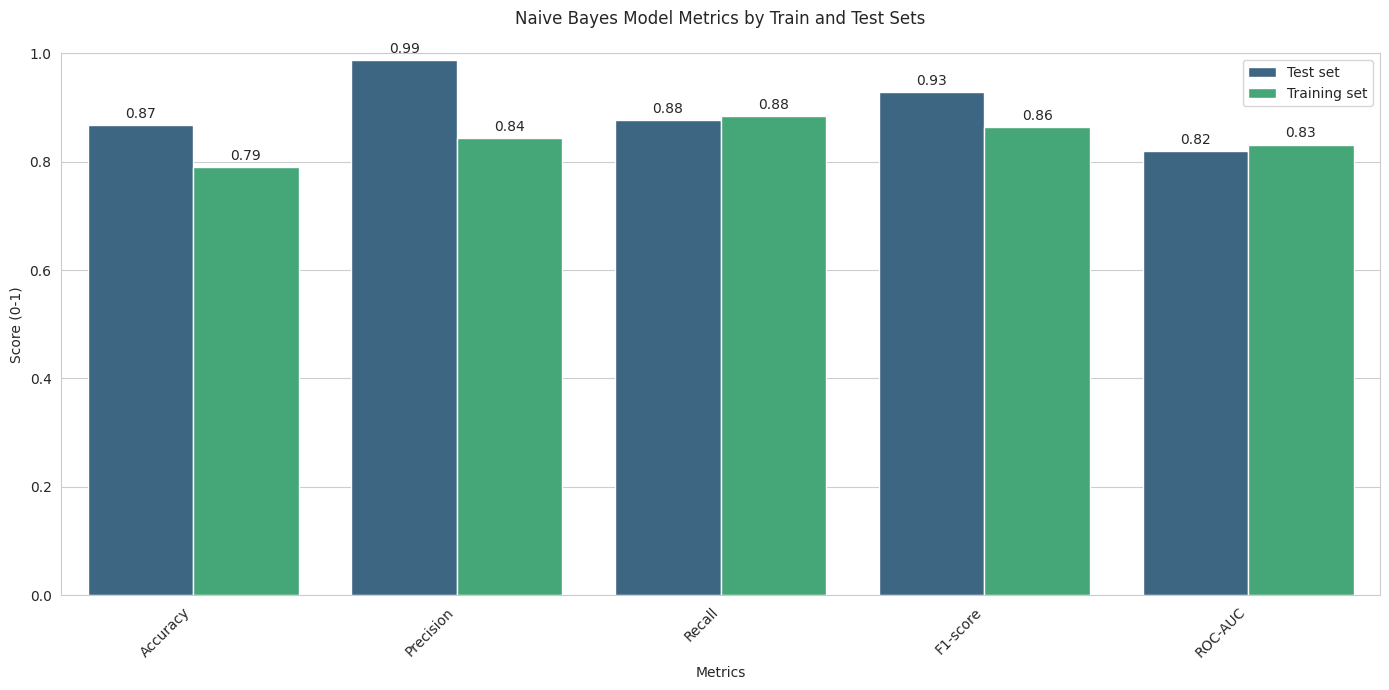

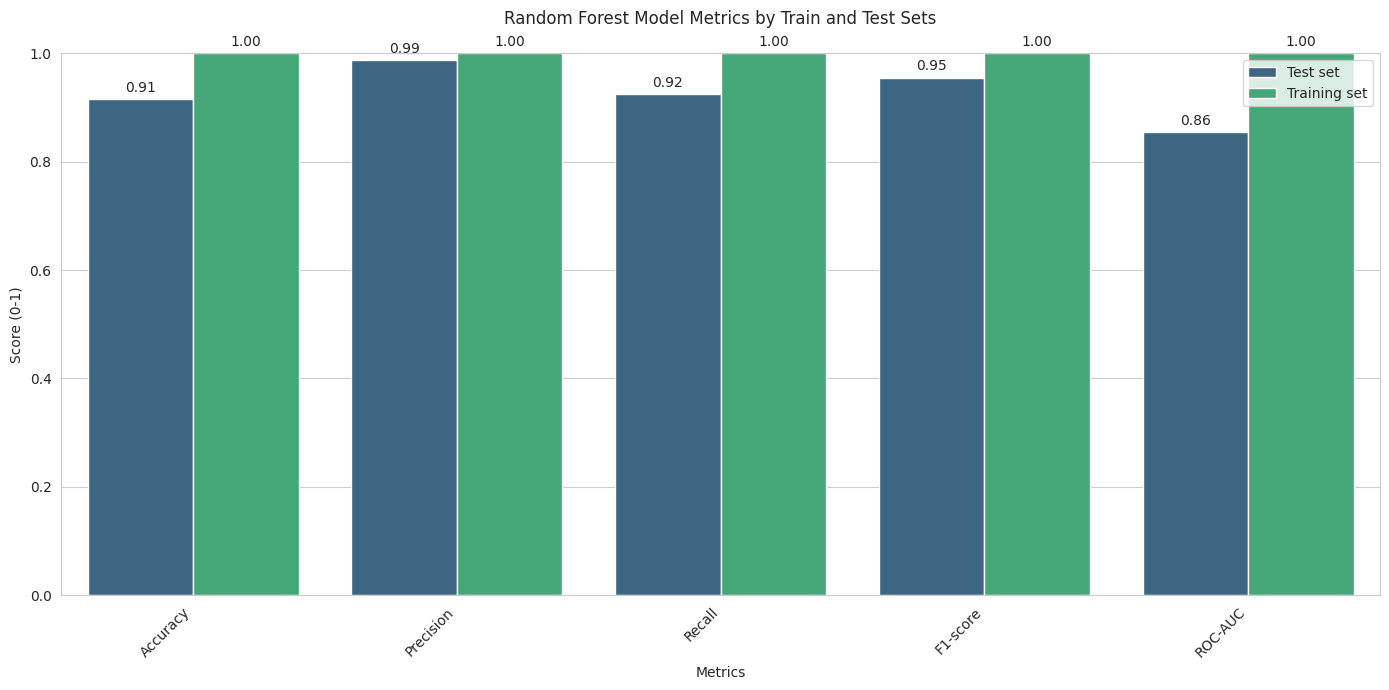

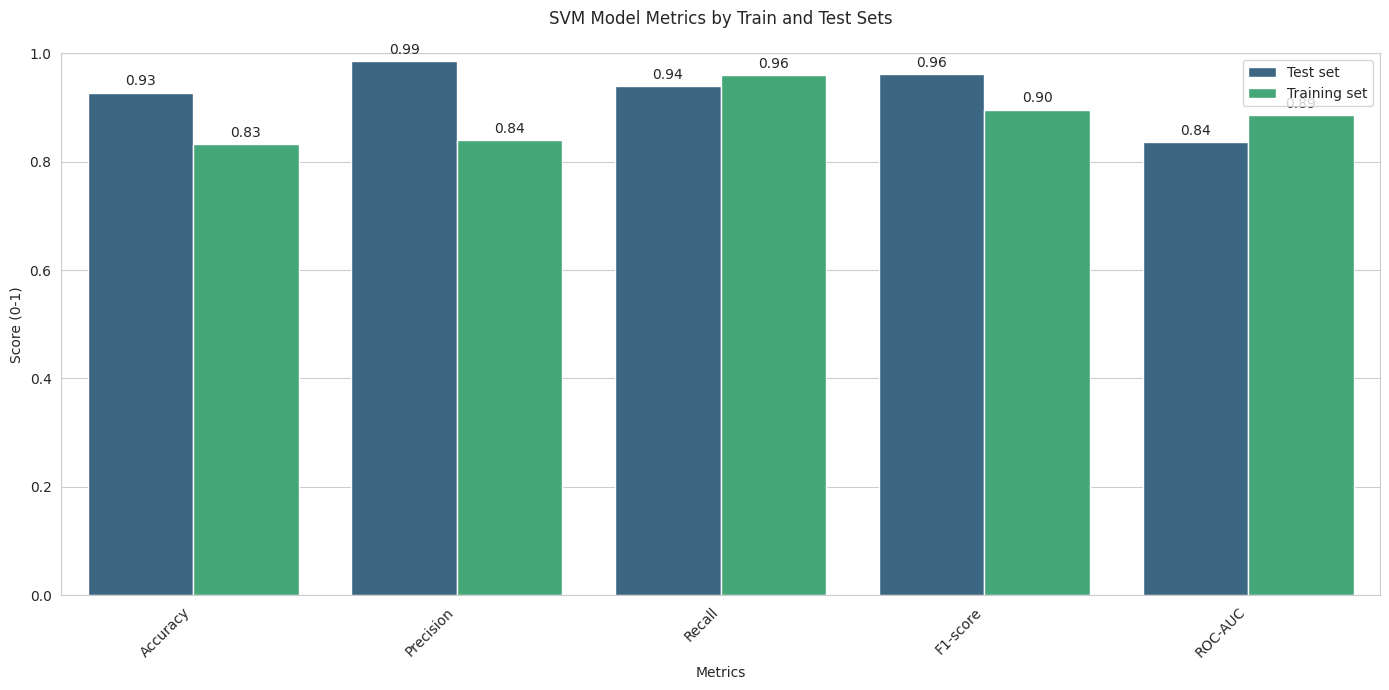

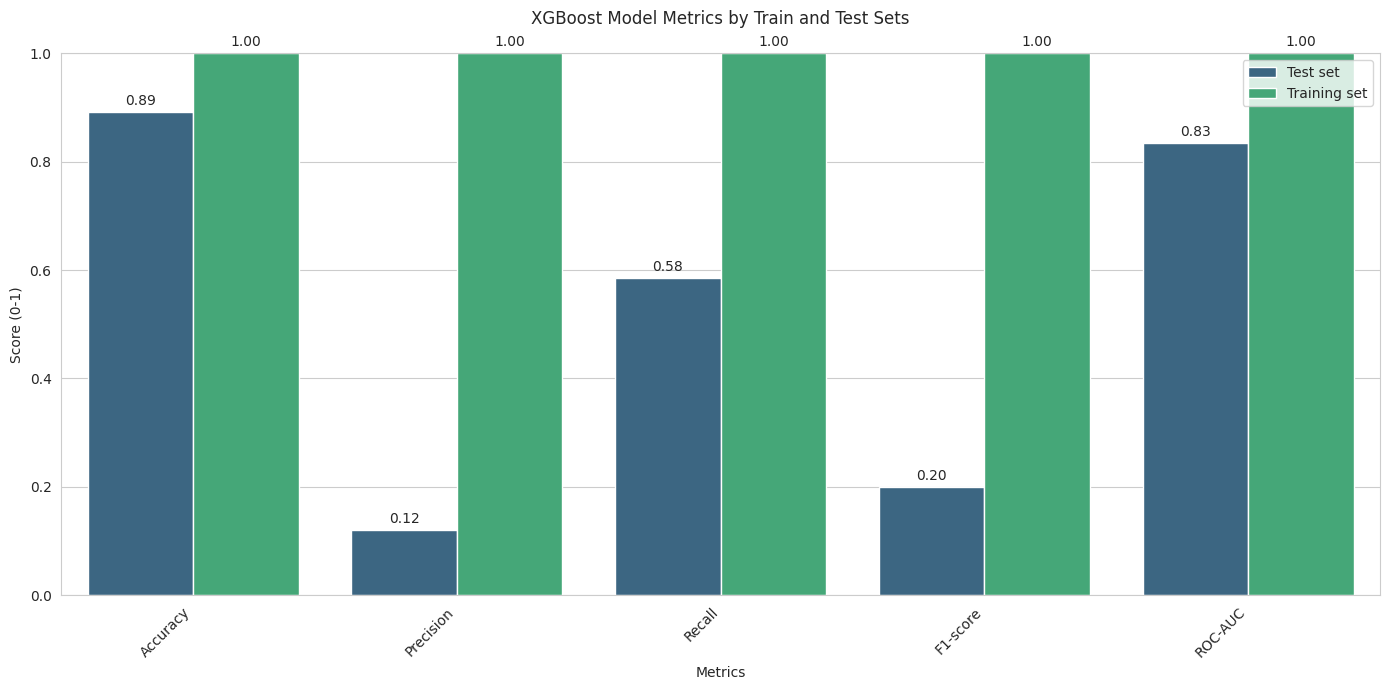

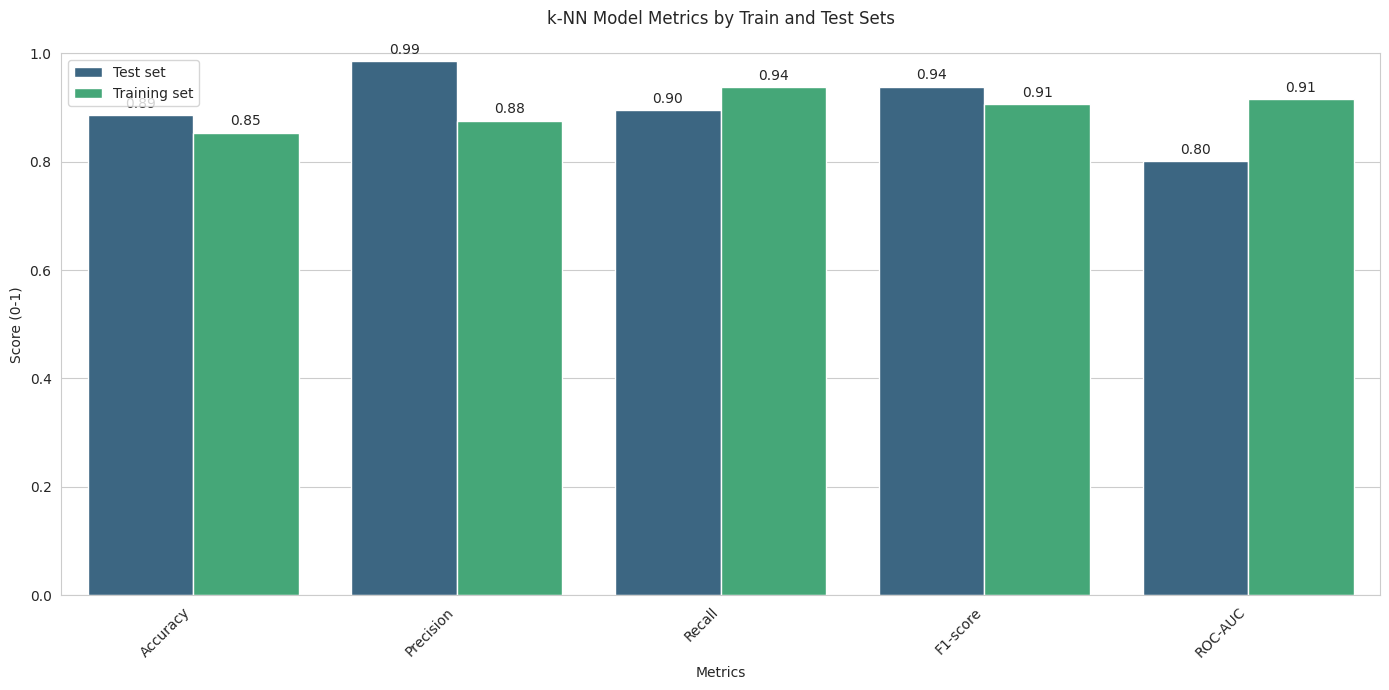

Charts generated successfully for each Machine Learning model.


In [17]:
sns.set_style("whitegrid")

# List of metrics to display on the X-axis of each model's chart
metrics_to_display = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']

# Get unique classifier names
classifier_names = df_avg_results['Classifier Name'].unique()

# Generate a separate chart for each Machine Learning model
for model_name in classifier_names:
    plt.figure(figsize=(14, 7))

    # Filter data for the current model
    model_data = df_avg_results[df_avg_results['Classifier Name'] == model_name]

    # Melt the DataFrame to have metrics as a column for easy plotting
    melted_model_data = model_data.melt(id_vars=['Classifier Name', 'Training or test set'],
                                       value_vars=metrics_to_display,
                                       var_name='Metric',
                                       value_name='Score')

    bar_plot = sns.barplot(x='Metric', y='Score', hue='Training or test set',
                           data=melted_model_data, palette='viridis')

    plt.title(f'{model_name} Model Metrics by Train and Test Sets\n')
    plt.xlabel('Metrics')
    plt.ylabel('Score (0-1)')
    plt.ylim(0, 1) # Ensure Y-axis is between 0 and 1
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
    plt.legend(title='') # Custom legend title

    # Annotate bars with exact scores
    for container in bar_plot.containers:
        bar_plot.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

print("Charts generated successfully for each Machine Learning model.")


8 CONFUSION MATRICES FOR EACH OF THE 8 METHODS

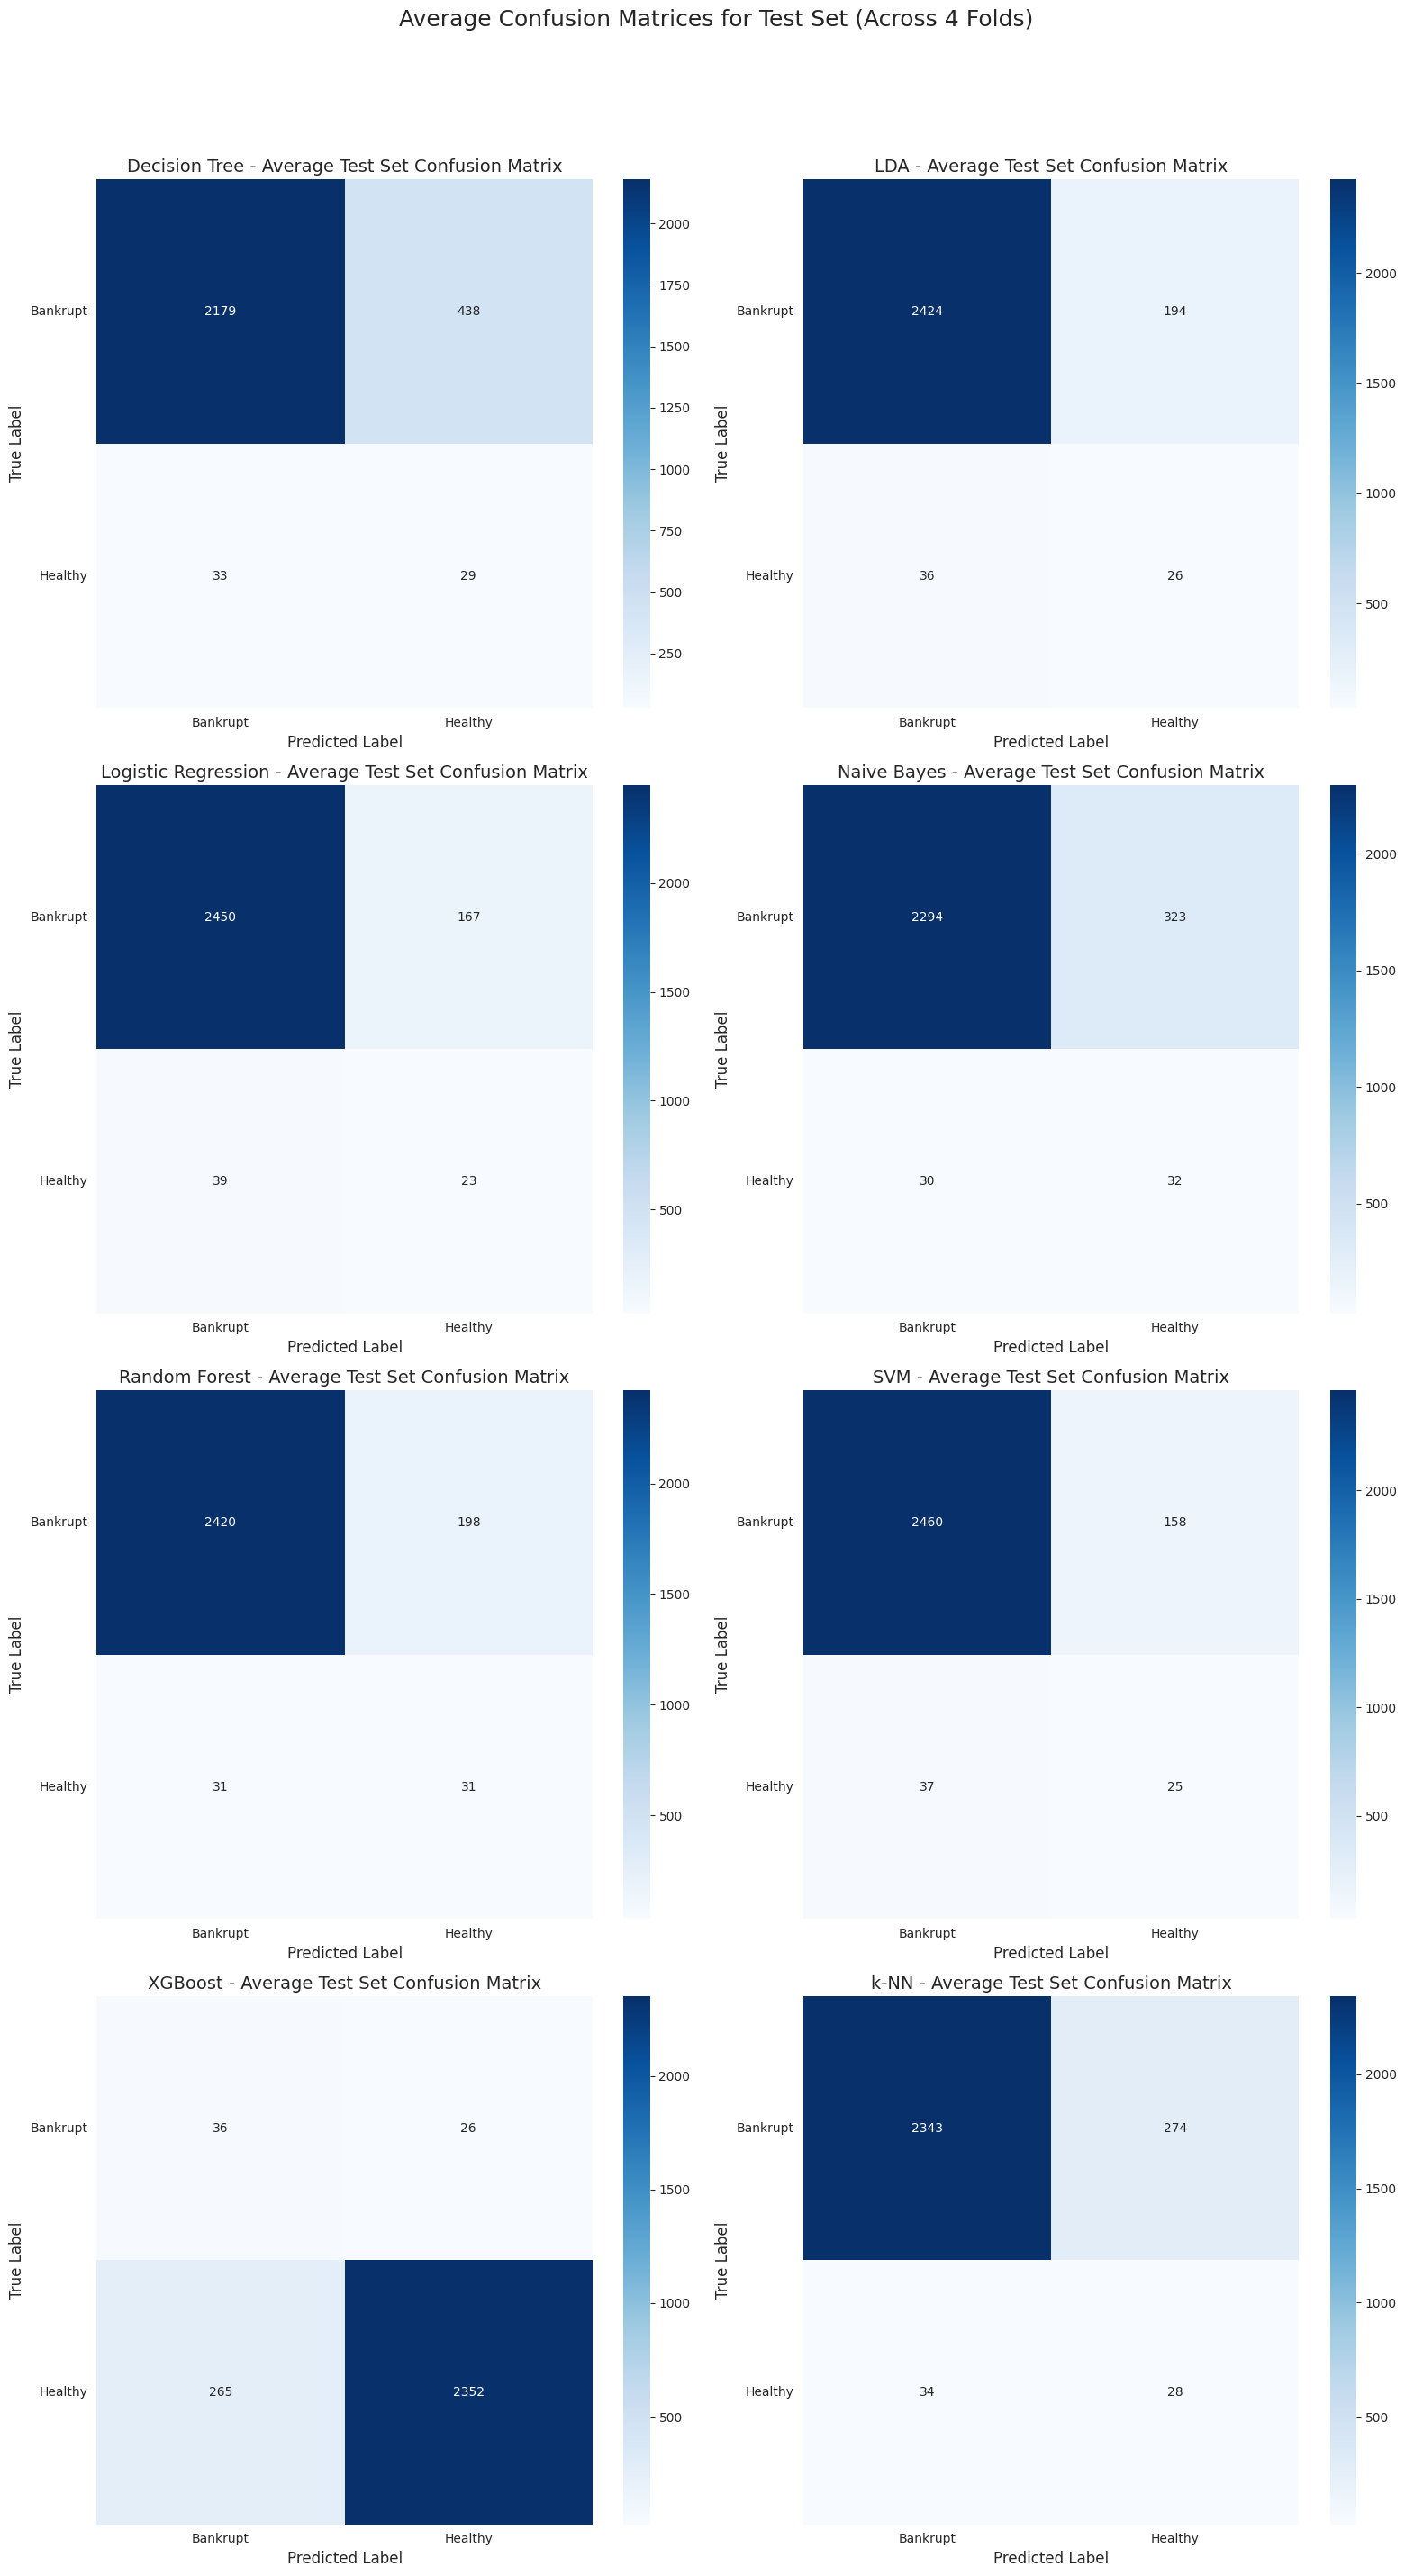

8 average confusion matrices for the test set generated successfully.


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Filter for Test Set results from df_results
df_test_results = df_results[df_results['Training or test set'] == 'Test set'].copy()

# 2. Group by Classifier Name and calculate the mean of TP, TN, FP, FN
avg_confusion_matrices_df = df_test_results.groupby('Classifier Name')[['TP', 'TN', 'FP', 'FN']].mean().reset_index()

# Define the order of classifiers for consistent plotting
classifier_order = [
    'LDA', 'Logistic Regression', 'Decision Tree', 'Random Forest',
    'k-NN', 'Naive Bayes', 'SVM', 'XGBoost'
]

# Sort the DataFrame by this order
avg_confusion_matrices_df['Classifier Name'] = pd.Categorical(avg_confusion_matrices_df['Classifier Name'], categories=classifier_order, ordered=True)
avg_confusion_matrices_df = avg_confusion_matrices_df.sort_values('Classifier Name')

# 3. Create a 4x2 grid for plotting
fig, axes = plt.subplots(4, 2, figsize=(16, 28)) # Adjusted figure size for better readability
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# 4. Generate and plot a heatmap for each classifier's average confusion matrix
for i, row in avg_confusion_matrices_df.iterrows():
    classifier_name = row['Classifier Name']

    # Round the average values to integers for display in the confusion matrix
    tp = int(round(row['TP']))
    tn = int(round(row['TN']))
    fp = int(round(row['FP']))
    fn = int(round(row['FN']))

    # Create the confusion matrix array.
    # The structure is assumed to be:
    # [[True Bankrupt -> Predicted Bankrupt (TP), True Bankrupt -> Predicted Healthy (FN)],
    #  [True Healthy  -> Predicted Bankrupt (FP), True Healthy  -> Predicted Healthy (TN)]]
    conf_matrix_data = np.array([[tp, fn], [fp, tn]])

    # Plotting the heatmap
    ax = axes[i]
    sns.heatmap(conf_matrix_data, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Bankrupt', 'Healthy'], yticklabels=['Bankrupt', 'Healthy'], ax=ax)
    ax.set_title(f'{classifier_name} - Average Test Set Confusion Matrix', fontsize=14)
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10, rotation=0) # Ensure y-labels are horizontal

plt.suptitle('Average Confusion Matrices for Test Set (Across 4 Folds)', y=1.02, fontsize=18) # Add a main title
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

print("8 average confusion matrices for the test set generated successfully.")

HEATMAP (Model Performance Heatmap) for comparing many models and many metrics at the same time AFTER TRAINNING THE MODELS

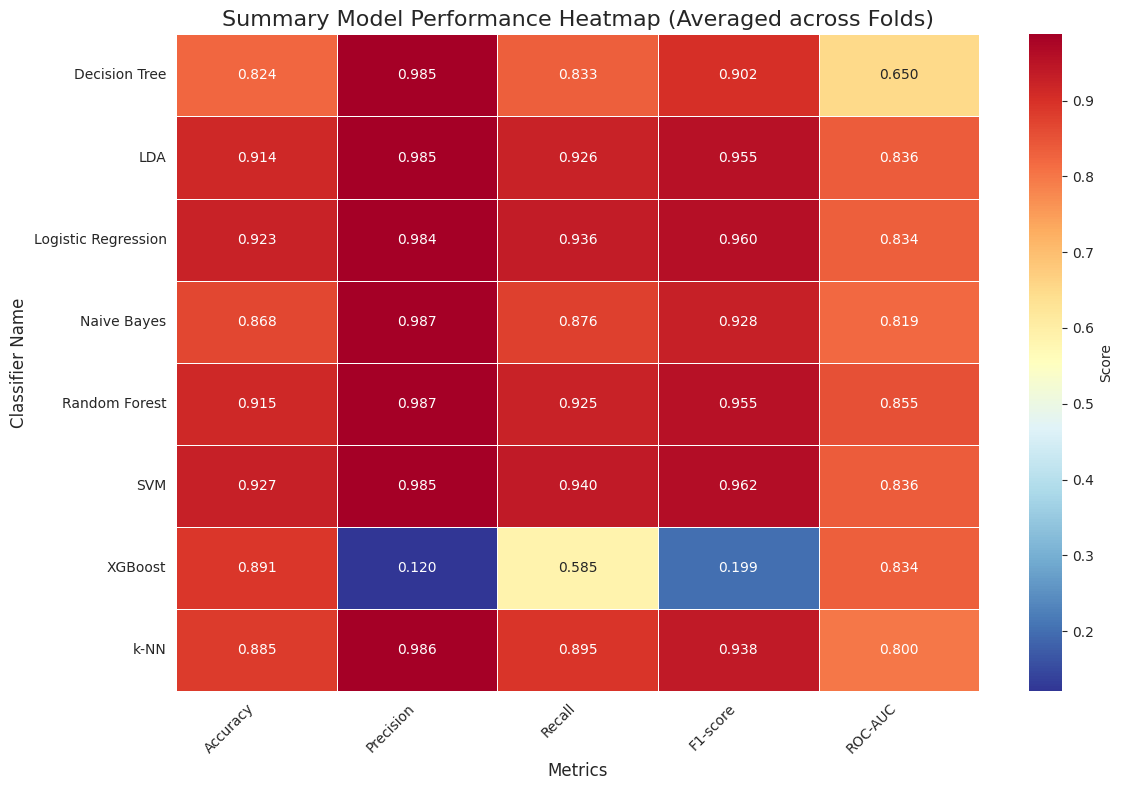

Model Performance Heatmap generated successfully.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter df_avg_results for 'Test set'
df_test_avg_results = df_avg_results[df_avg_results['Training or test set'] == 'Test set'].copy()

# Define the metrics to display
metrics_to_display = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']

# Create the heatmap data by setting 'Classifier Name' as index and selecting the metric columns
heatmap_data = df_test_avg_results.set_index('Classifier Name')[metrics_to_display]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data,
            annot=True, # Display values
            fmt=".3f",  # Format values to 3 decimal places
            cmap='RdYlBu_r', # Color palette (RdYlBu_r for diverging, coolwarm also good)
            linewidths=.5,
            cbar_kws={'label': 'Score'})

plt.title('Summary Model Performance Heatmap (Averaged across Folds)', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Classifier Name', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.yticks(rotation=0) # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()

print("Model Performance Heatmap generated successfully.")

CHARTS FOR TP TN FP FN FOR EACH OF THE 8 METHODS

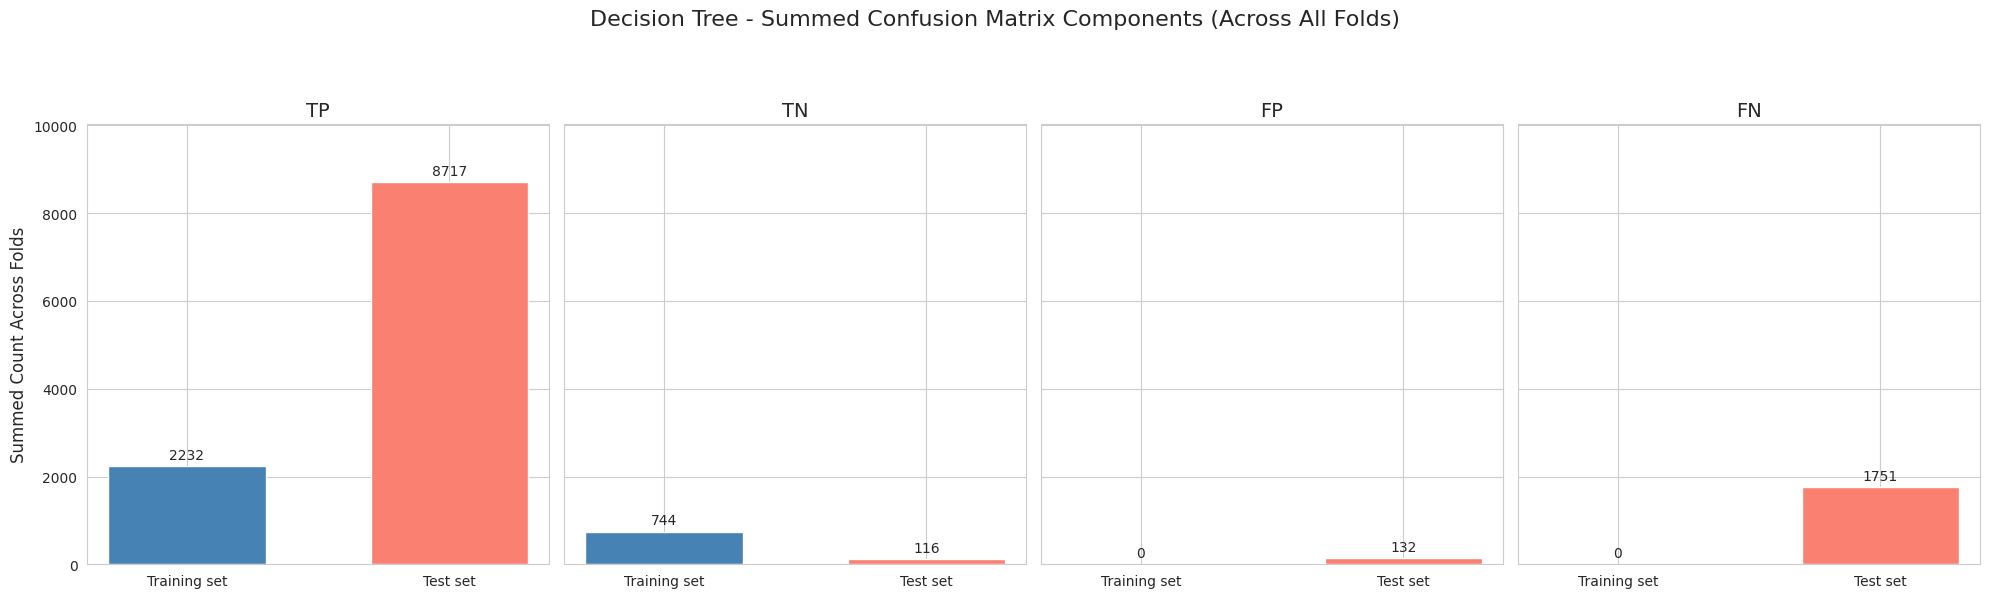

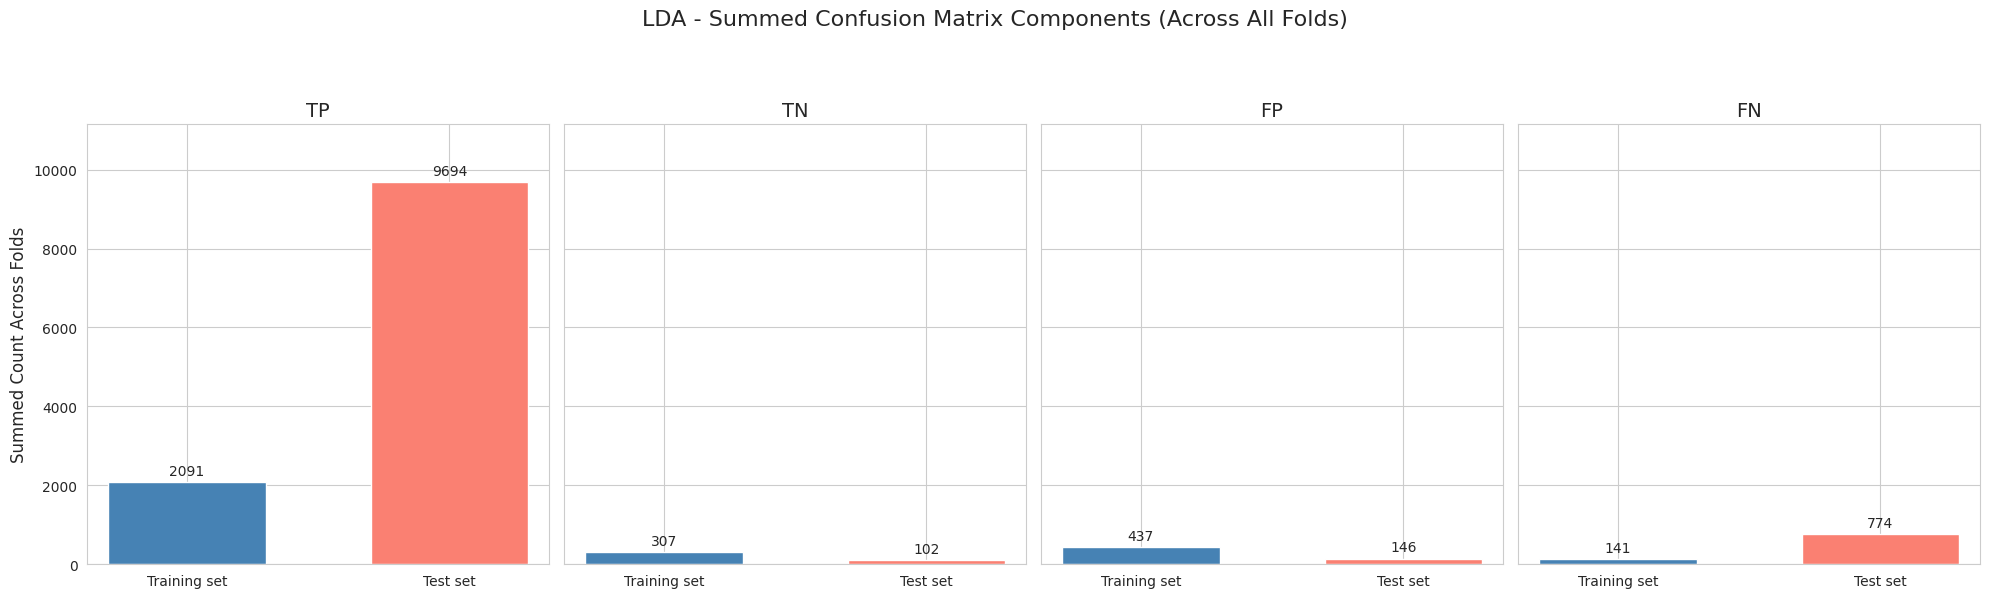

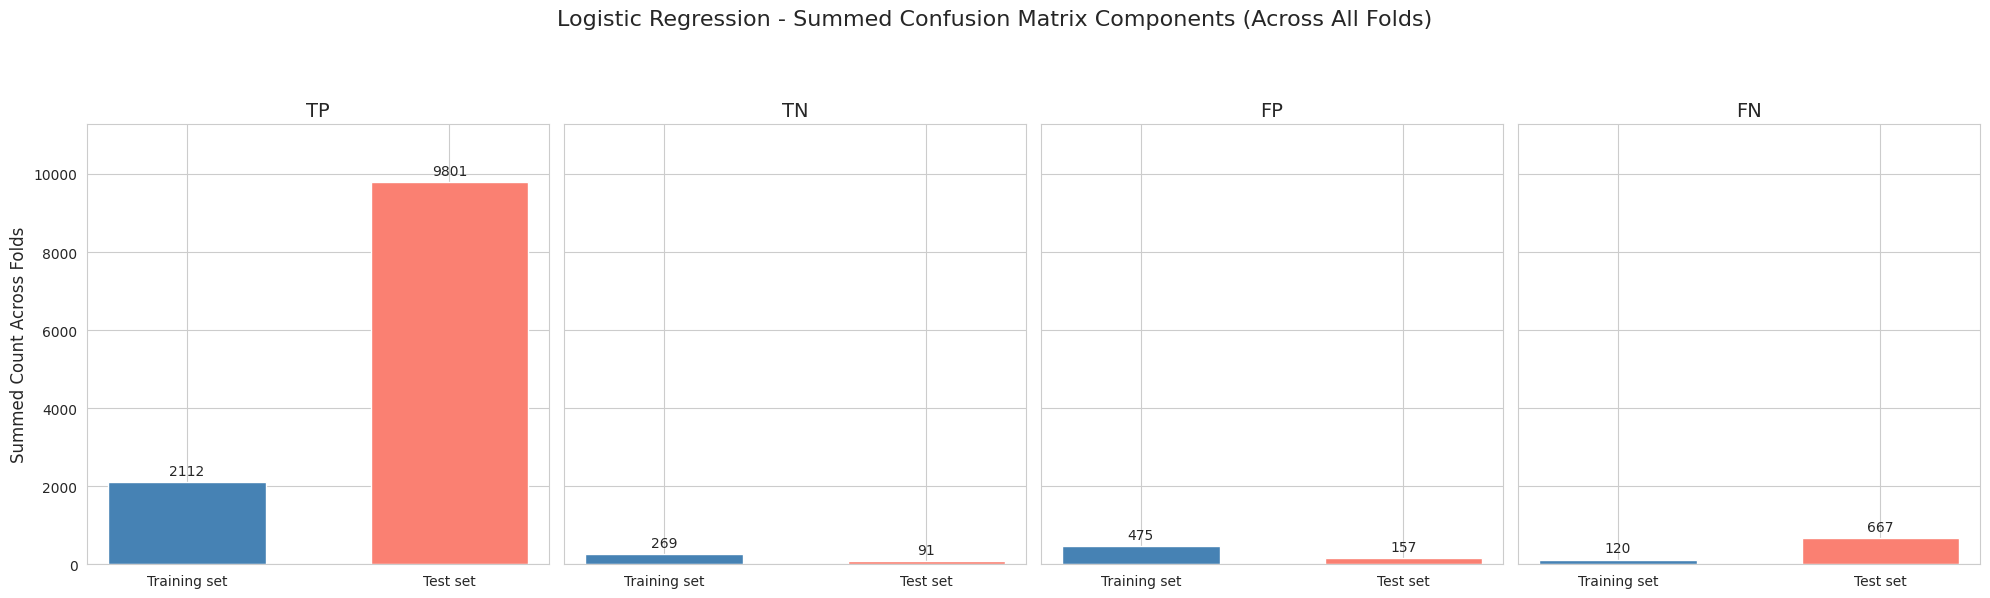

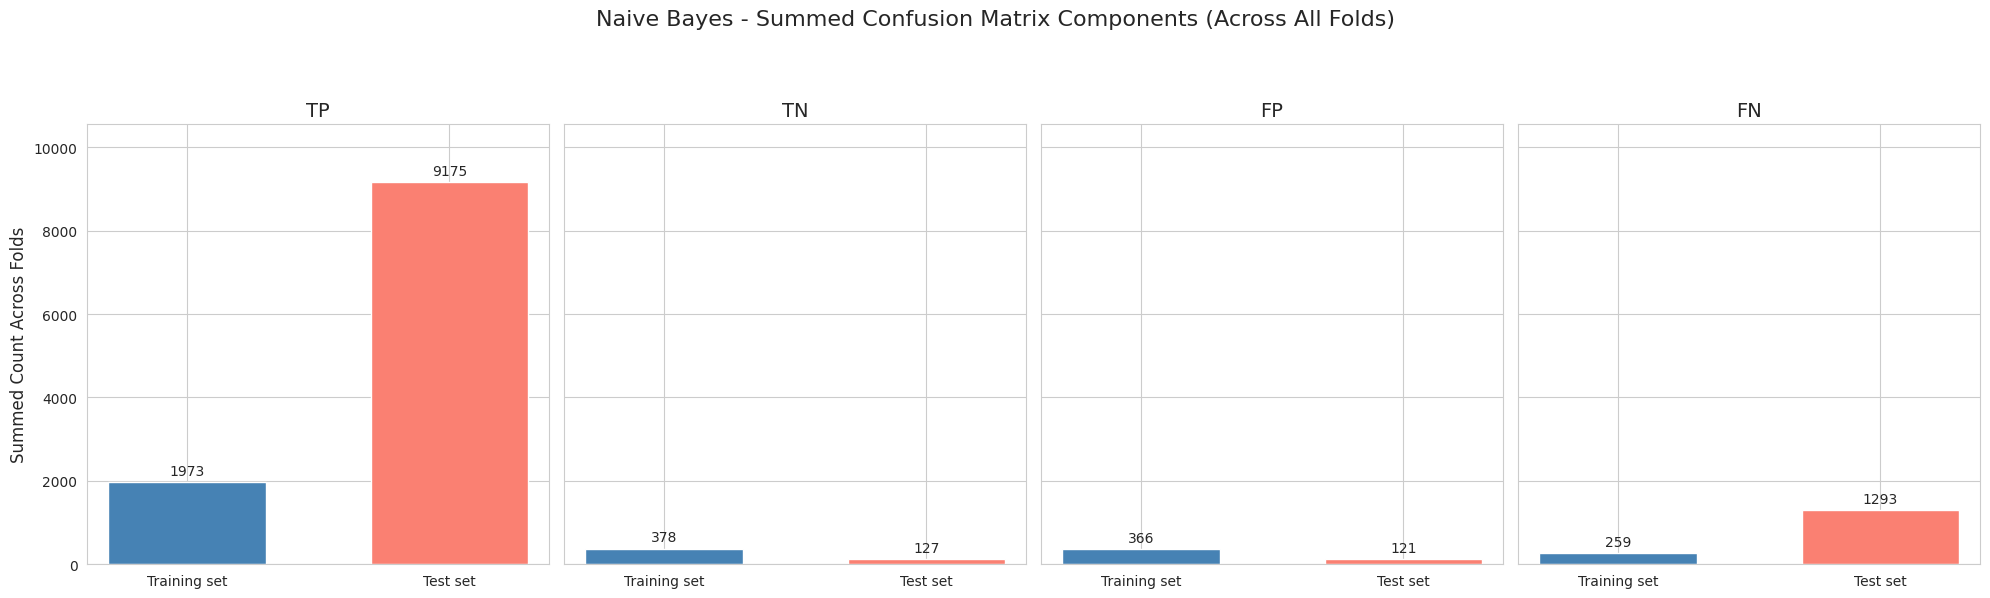

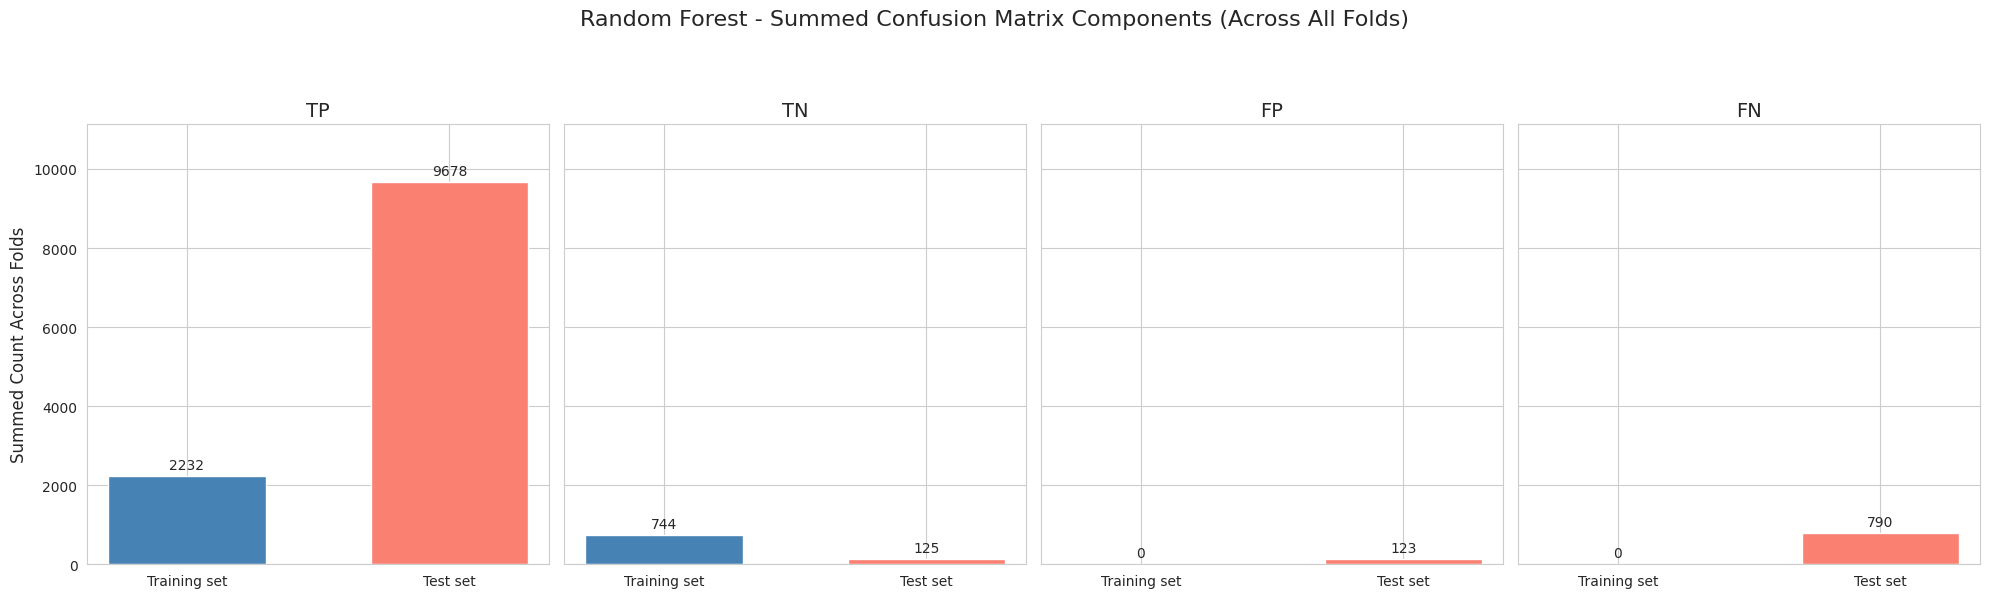

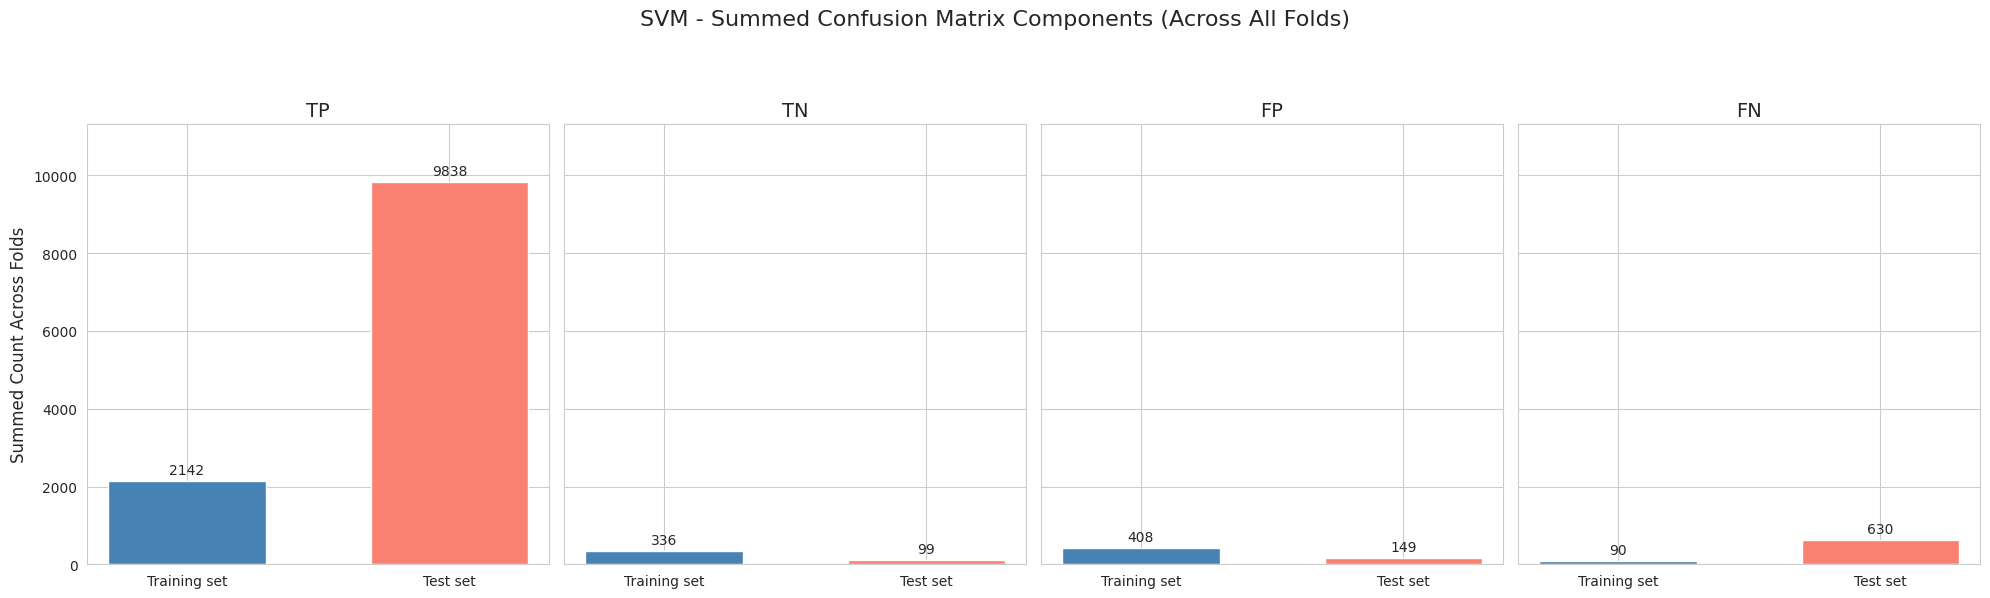

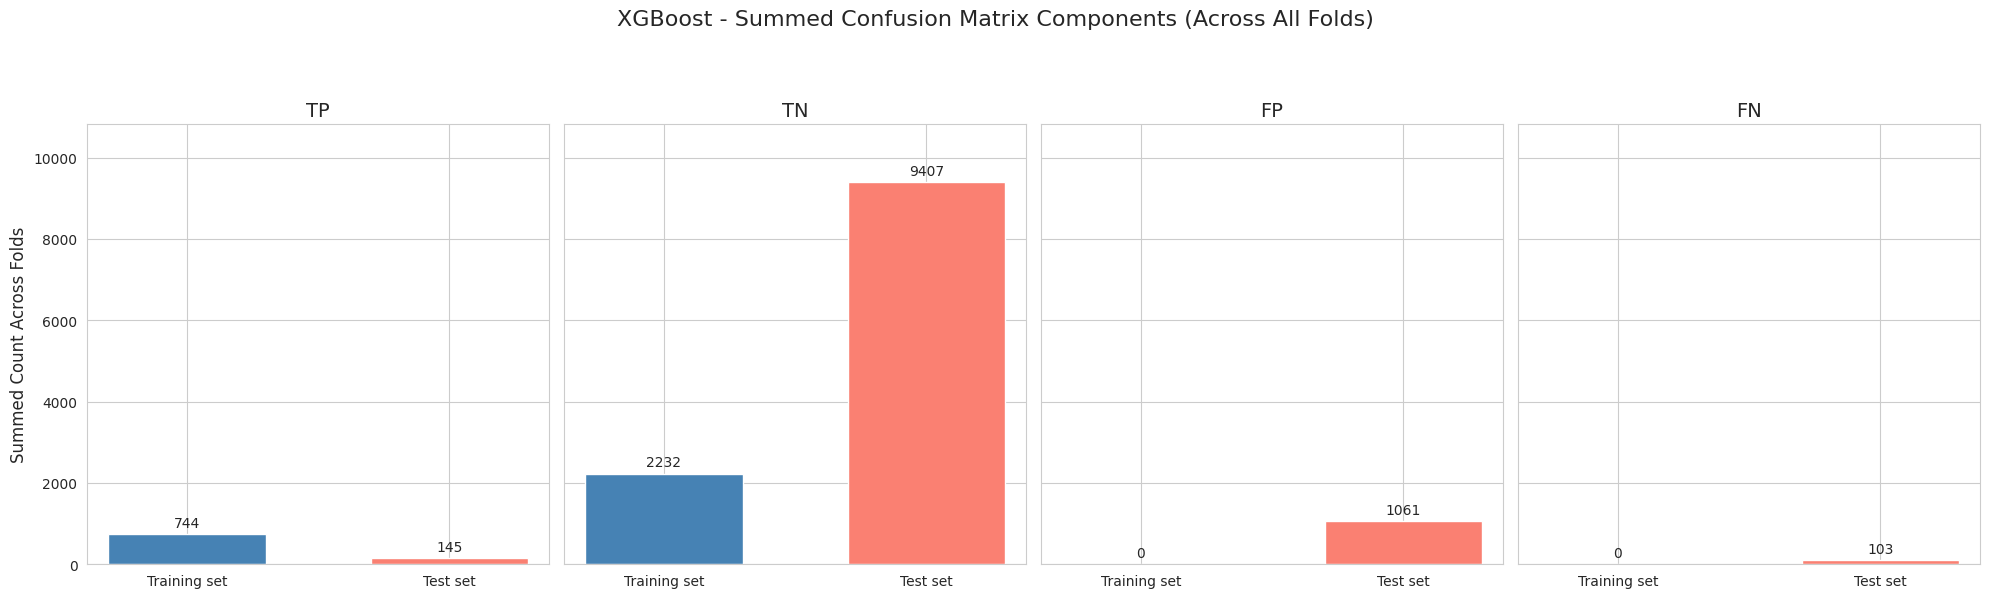

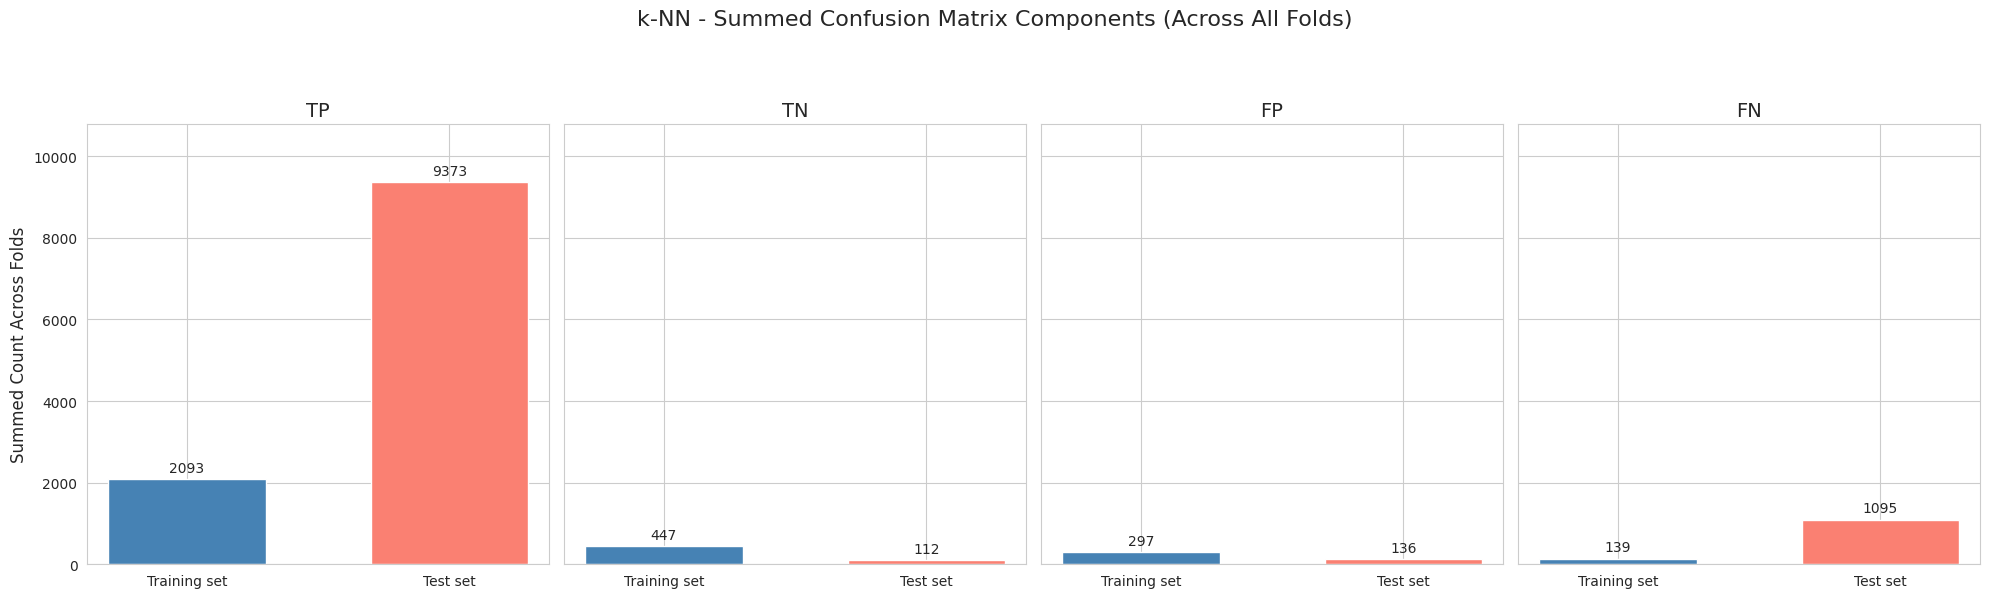




32 bar charts for TP, TN, FP, FN generated successfully for all models.


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure df_results is available (it is from the previous cell)
# df_results = pd.DataFrame(results_list) # This line is commented as df_results is already defined

# Group by Classifier Name and Training/Test set and sum the TP, TN, FP, FN
# This aggregates the counts across all 4 folds for each model and set type
df_summed_confusion_metrics = df_results.groupby(['Classifier Name', 'Training or test set'])[
    ['TP', 'TN', 'FP', 'FN']
].sum().reset_index()

# Get unique classifier names to iterate through models
classifier_names = df_summed_confusion_metrics['Classifier Name'].unique()

# Define the confusion matrix components to plot
confusion_metrics = ['TP', 'TN', 'FP', 'FN']

# Set a consistent style for all plots
sns.set_style("whitegrid")

# Generate a figure for each Machine Learning classifier
for model_name in classifier_names:
    # Filter data for the current model
    model_data = df_summed_confusion_metrics[df_summed_confusion_metrics['Classifier Name'] == model_name]

    # Create a figure with 1 row and 4 subplots for TP, TN, FP, FN
    # sharey=True ensures that all subplots in the same figure have the same y-axis scale
    fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

    # Set a main title for the entire figure
    fig.suptitle(f'{model_name} - Summed Confusion Matrix Components (Across All Folds)', fontsize=16, y=1.02)

    # Determine the maximum value across all confusion metrics for this model
    # This helps in setting a consistent y-axis limit for all subplots within the figure
    max_val = model_data[confusion_metrics].values.max()
    y_upper_limit = max_val * 1.15  # Add a 15% buffer for aesthetics and annotation space

    # Iterate through each confusion matrix metric (TP, TN, FP, FN)
    for i, metric in enumerate(confusion_metrics):
        ax = axes[i]

        # Extract the sum of the current metric for 'Training set' and 'Test set'
        train_val = model_data[model_data['Training or test set'] == 'Training set'][metric].values[0]
        test_val = model_data[model_data['Training or test set'] == 'Test set'][metric].values[0]

        # Plot the bars
        bars = ax.bar(['Training set', 'Test set'], [train_val, test_val],
                      color=['steelblue', 'salmon'], # Distinct colors for train/test
                      width=0.6) # Adjust bar width for better appearance

        ax.set_title(f'{metric}', fontsize=14)
        ax.set_ylim(0, y_upper_limit) # Apply the consistent y-axis limit

        # Annotate each bar with its exact integer value
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{int(height)}', # Format as integer
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

        # Set y-label only for the first subplot to avoid redundancy
        if i == 0:
            ax.set_ylabel('Summed Count Across Folds', fontsize=12)

        # Keep x-axis labels horizontal for readability
        ax.tick_params(axis='x', rotation=0)

    # Adjust layout to prevent overlapping elements, especially the main title
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    print("\n\n")

print("32 bar charts for TP, TN, FP, FN generated successfully for all models.")

ΕΡΩΤΗΜΑ 10

In [21]:
import pandas as pd
from google.colab import files
import numpy as np

# 1. Data Preparation: Convert the results_list into a DataFrame named df_final_results
df_final_results = pd.DataFrame(results_list)

# 2. Column Names: Ensure the CSV has exactly these columns in this order
required_columns = [
    'Classifier Name',
    'Training or test set',
    'Balanced or unbalanced train set',
    'Number of training samples',
    'Number of non-healthy companies in training sample',
    'TP', 'TN', 'FP', 'FN',
    'ROC-AUC',
    'Execution Time (sec)'
]

df_final_results = df_final_results[required_columns].copy() # .copy() to avoid SettingWithCopyWarning

# 3. Data Types & Formatting:
# All count columns (TP, TN, FP, FN, Sample sizes) must be Integers (int)
count_cols = [
    'Number of training samples',
    'Number of non-healthy companies in training sample',
    'TP', 'TN', 'FP', 'FN'
]
for col in count_cols:
    # Convert to numeric, handle NaNs by filling with 0, then convert to int
    df_final_results[col] = df_final_results[col].apply(lambda x: int(np.round(x)) if pd.notnull(x) else 0)

# 'ROC-AUC' and 'Execution Time' must be Doubles/Floats rounded to 4 decimal places
float_cols = ['ROC-AUC', 'Execution Time (sec)']
for col in float_cols:
    df_final_results[col] = df_final_results[col].round(4)

# 4. Export: Save the DataFrame to a file named balancedDataOutcomes.csv without the index.
csv_file_name = 'balancedDataOutcomes.csv'
df_final_results.to_csv(csv_file_name, index=False)

# 5. Download: Use from google.colab import files and files.download('balancedDataOutcomes.csv')
#files.download(csv_file_name)

# Print a message saying 'Final results exported successfully to balancedDataOutcomes.csv'.
print(f"Final results exported successfully to {csv_file_name}")

#Το αρχείο balancedDataOutcomes.csv βρίσκεται αριστερά στα files.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Final results exported successfully to balancedDataOutcomes.csv
